In [29]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ishit\anaconda3\Lib\site-packages\pip\_vend

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [30]:
import sklearn # main module for machine learning algorithms and tools (e.g., classification, regression, clustering, etc.)
import imblearn # library for handling imbalanced datasets, including techniques like SMOTE, Tomek Links, etc.

print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)

scikit-learn: 1.2.2
imbalanced-learn: 0.10.1


In [31]:
import numpy as np # for numerical operations and handling arrays; linear algebra
import pandas as pd # for data manipulation, CSV reading, and DataFrame handling; data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for advanced data visualization (e.g., heatmaps, violin plots, etc.)
import matplotlib.pyplot as plt # for basic plotting like line plots, bar charts, etc.
import os # for interacting with the operating system (file paths)
import warnings # to manage and suppress warning messages

from sklearn.model_selection import train_test_split # to split the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder # to convert categorical labels into numeric format
from imblearn.over_sampling import SMOTE # to generate synthetic samples for the minority class to handle class imbalance
from collections import Counter # to count the number of occurrences of each class in the dataset

In [32]:
# Directory where the dataset is located
data_dir = r"C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks"

# Walk through the dataset directory and list all CSV files
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.endswith(".csv"):  # Ensure only CSV files are listed
            print(os.path.join(dirname, filename))

C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data1.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data10.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data11.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data12.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data13.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data14.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data15.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data2.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data3.csv
C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data

In [33]:
# the plots are displayed inline within the notebook, rather than in a separate window or output cell
%matplotlib inline 

warnings.filterwarnings('ignore') # Suppresses warnings for cleaner output

In [34]:
# Configure pandas to display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

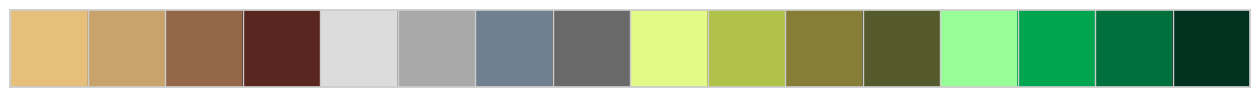

In [35]:
# Custom color palette for visualizations
colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors)) # Display the color palette for reference

# Preprocessing

In [36]:
# Load the dataset from CSV
df= pd.read_csv(r'C:\Users\ishit\Downloads\VIT Vellore\Capstone\dataset\binaryAllNaturalPlusNormalVsAttacks\data1.csv')
print(df.shape)

(4966, 129)


In [37]:
print(df.columns)
print(df.dtypes)

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log',
       'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4',
       'marker'],
      dtype='object', length=129)
R1-PA1:VH             float64
R1-PM1:V              float64
R1-PA2:VH             float64
R1-PM2:V              float64
R1-PA3:VH             float64
R1-PM3:V              float64
R1-PA4:IH             float64
R1-PM4:I              float64
R1-PA5:IH             float64
R1-PM5:I              float64
R1-PA6:IH             float64
R1-PM6:I              float64
R1-PA7:VH             float64
R1-PM7:V              float64
R1-PA8:VH             float64
R1-PM8:V              float64
R1-PA9:VH             float64
R1-PM9:V              float64
R1-PA10:IH            float64
R1-PM10:I             float64
R1-PA11:IH            float64
R1-PM11:I           

In [38]:
# Checking for NaN and inf rows
print("Rows with NaN:", df.isna().any(axis=1).sum())

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now safely check for inf
print("Rows with inf:", np.isinf(numeric_df).any(axis=1).sum())


Rows with NaN: 0
Rows with inf: 348


In [39]:
# Clean the data
# Replace inf/-inf with NaN, then drop all rows with any NaNs
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Display first few rows of the cleaned dataset
df.head()

R1-PA1:VH     R1-PM1:V  R1-PA2:VH     R1-PM2:V   R1-PA3:VH     R1-PM3:V  \
0  70.399324  127673.0908 -49.572308  127648.0176 -169.578319  127723.2374   
1  73.688102  130280.7109 -46.300719  130255.6377 -166.278082  130355.9307   
2  73.733939  130305.7842 -46.254883  130280.7109 -166.232245  130381.0040   
3  74.083443  130581.5902 -45.899649  130556.5169 -165.882741  130656.8100   
4  74.553268  131083.0556 -45.424094  131057.9823 -165.424375  131158.2754   

   R1-PA4:IH   R1-PM4:I  R1-PA5:IH   R1-PM5:I   R1-PA6:IH   R1-PM6:I  \
0  65.689611  605.91099 -57.003571  626.78553 -173.589023  602.43190   
1  71.831719  483.59351 -50.947407  500.98896 -167.487023  481.39619   
2  71.808800  483.59351 -50.913030  500.98896 -167.441186  481.02997   
3  72.152575  482.86107 -50.437475  499.15786 -167.286487  481.39619   
4  72.118198  484.50906 -50.013486  497.69298 -167.464104  484.69217   

   R1-PA7:VH     R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  R1-PM9:V  \
0  70.422243  127673.0908        0.0       0.0        0.0       0.0   
1  73.705291  130305.7842        0.0       0.0        0.0       0.0   
2  73.751127  130330.8575        0.0       0.0        0.0       0.0   
3  74.106361  130581.5902        0.0       0.0        0.0       0.0   
4  74.570457  131108.1288        0.0       0.0        0.0       0.0   

   R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  R1-PM12:I  \
0   65.007791  611.58740  118.567886   13.18392 -100.869220   13.91636   
1   71.109792  488.35437  125.792884   10.62038  -95.884487   11.35282   
2   71.132710  488.35437  125.007932   10.62038  -94.520847   11.35282   
3   71.459296  487.62193  127.597701    9.70483  -96.657980   10.43727   
4   71.539510  488.90370  127.666456    7.50751  -99.923839    8.60617   

     R1:F  R1:DF   R1-PA:Z  R1-PA:ZH  R1:S  R2-PA1:VH     R2-PM1:V  R2-PA2:VH  \
0  59.999   0.01  6.391383  0.076290     0  60.658268  124631.8125 -59.295959   
1  60.005   0.00  8.185463  0.024924     0  66.069035  128277.4297 -53.885193   
2  60.005   0.00  8.190006  0.027904     0  66.112980  128283.9453 -53.852234   
3  60.003   0.00  8.171532  0.025617     0  66.508489  128585.4063 -53.445742   
4  60.001   0.00  8.079496  0.032941     0  67.035827  129106.9063 -52.912905   

      R2-PM2:V   R2-PA3:VH     R2-PM3:V   R2-PA4:IH    R2-PM4:I   R2-PA5:IH  \
0  124484.3594 -179.338078  124715.0703 -119.550481  612.796753  117.726753   
1  128126.3047 -173.932803  128354.7578 -114.925241  489.349365  122.148740   
2  128144.4688 -173.883366  128382.9609 -114.919736  488.885864  122.214665   
3  128442.6094 -173.487857  128673.4141 -114.815371  489.864349  122.648628   
4  128974.5859 -172.949529  129196.8125 -114.919736  491.294861  123.071594   

     R2-PM5:I  R2-PA6:IH    R2-PM6:I  R2-PA7:VH     R2-PM7:V  R2-PA8:VH  \
0  632.532104   0.859680  610.141724  60.680241  124611.9844        0.0   
1  505.754456   5.468445  487.335205  66.085509  128251.6250        0.0   
2  505.531311   5.462952  487.627014  66.129454  128269.5938        0.0   
3  504.226685   5.693665  487.369537  66.530462  128566.9453        0.0   
4  502.498627   5.413513  489.595398  67.063298  129091.6250        0.0   

   R2-PM8:V  R2-PA9:VH  R2-PM9:V  R2-PA10:IH   R2-PM10:I  R2-PA11:IH  \
0       0.0        0.0       0.0 -120.341499  618.301392  -64.053043   
1       0.0        0.0       0.0 -115.787662  493.978516  -59.669496   
2       0.0        0.0       0.0 -115.765696  493.852600  -58.653259   
3       0.0        0.0       0.0 -115.507515  493.680969  -61.740416   
4       0.0        0.0       0.0 -115.491027  494.379028  -60.619814   

   R2-PM11:I  R2-PA12:IH  R2-PM12:I       R2:F  R2:DF   R2-PA:Z  R2-PA:ZH  \
0  12.765884   69.397891  12.828827  59.999001   0.02  6.130100  3.135101   
1  10.797501   72.424621  10.808945  60.005001   0.00  7.924891 -3.136669   
2  10.396957   72.177430  10.768890  60.005001   0.00  7.931677 -3.136360   
3   9.653091   75.451358   9.738922  60.005001   0.00  7.889895 -3.126737  

In [40]:
print(df.shape)

(4618, 129)


In [41]:
# Define features (X) and target variable (y)
X = df.drop('marker',axis=1) # All columns except the target
y = df['marker'] # The 'marker' column as the target

# Split the data into training and testing sets (80% training, 20% testing)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [42]:
# Display distribution of target variable 'marker'
df['marker'].value_counts()

marker
Attack     3610
Natural    1008
Name: count, dtype: int64

In [43]:
# Check distribution of values for specific columns related to relays (R1:S, R2:S, etc.)
for col in df[['R1:S','R2:S','R3:S','R4:S']]:
    print(f"\033[031m\033[1m",col,":")
    print(f"\033[034m\033[1m",df[col].value_counts()) # Print value counts for each column
    print(f"\033[035m\033[1m","==="*10)

 R1:S :
 R1:S
0       4605
2058       9
2056       2
2048       2
Name: count, dtype: int64
 R2:S :
 R2:S
0    4618
Name: count, dtype: int64
 R3:S :
 R3:S
0    4618
Name: count, dtype: int64
 R4:S :
 R4:S
0       4613
2058       5
Name: count, dtype: int64


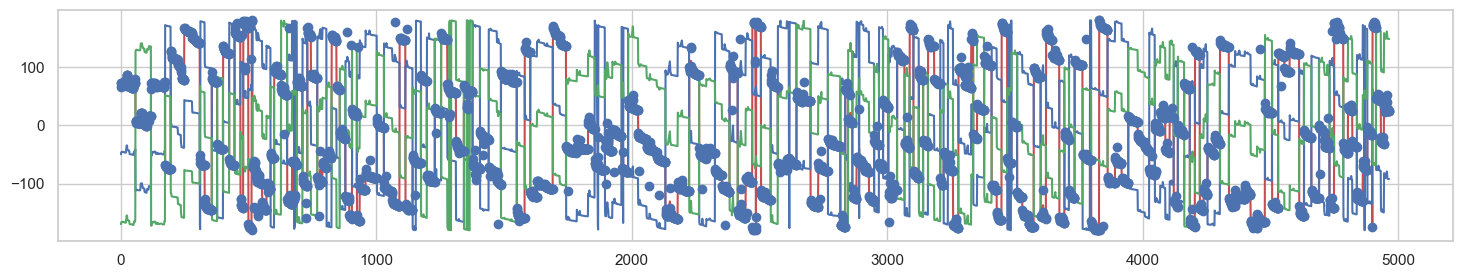

In [44]:
# Plotting measurements from PMU R1 (phase voltage, phase angle)
ax = plt.figure(figsize = (18,3))
ax = plt.plot(df["R1-PA1:VH"],'r') # Phase A voltage (Red)
ax = plt.plot(df["R1-PA2:VH"],'b') # Phase B voltage (Blue)
ax = plt.plot(df["R1-PA3:VH"],'g') # Phase C voltage (Green)
ax = plt.plot(df["R1-PA4:IH"],'o'); # Phase A current (Circles)

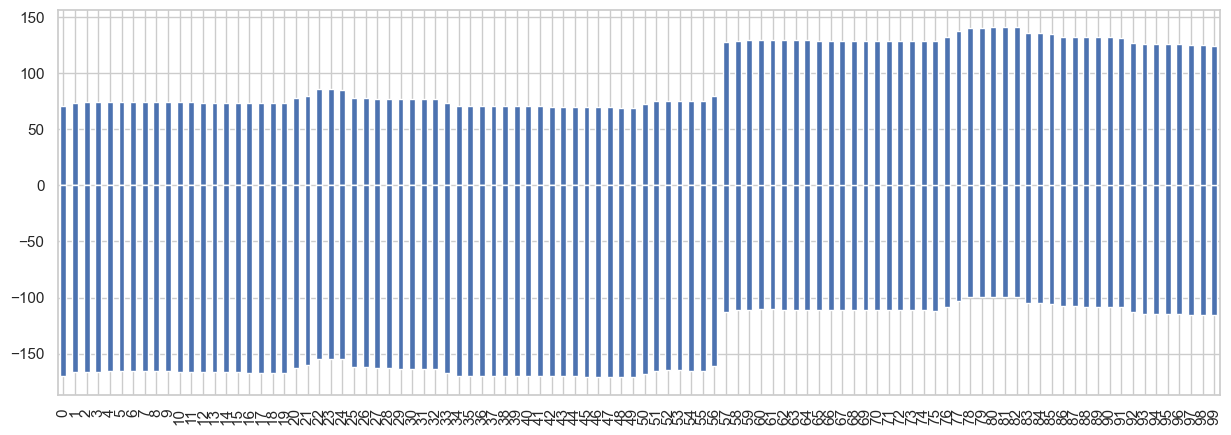

In [45]:
# Bar plots for initial 100 data points in various columns
df["R1-PA1:VH"][:100].plot(kind="bar",figsize=(15,5))
df["R1-PA2:VH"][:100].plot(kind="bar",figsize=(15,5))
df["R1-PA3:VH"][:100].plot(kind="bar",figsize=(15,5))
plt.show()

In [46]:
# Encoding the target variable 'marker' (categorical to numerical)
# Natural = 1, Attack = 0
encoder = LabelEncoder()
df['marker'] = encoder.fit_transform(df['marker']) # Converts labels to integers
df.head()

R1-PA1:VH     R1-PM1:V  R1-PA2:VH     R1-PM2:V   R1-PA3:VH     R1-PM3:V  \
0  70.399324  127673.0908 -49.572308  127648.0176 -169.578319  127723.2374   
1  73.688102  130280.7109 -46.300719  130255.6377 -166.278082  130355.9307   
2  73.733939  130305.7842 -46.254883  130280.7109 -166.232245  130381.0040   
3  74.083443  130581.5902 -45.899649  130556.5169 -165.882741  130656.8100   
4  74.553268  131083.0556 -45.424094  131057.9823 -165.424375  131158.2754   

   R1-PA4:IH   R1-PM4:I  R1-PA5:IH   R1-PM5:I   R1-PA6:IH   R1-PM6:I  \
0  65.689611  605.91099 -57.003571  626.78553 -173.589023  602.43190   
1  71.831719  483.59351 -50.947407  500.98896 -167.487023  481.39619   
2  71.808800  483.59351 -50.913030  500.98896 -167.441186  481.02997   
3  72.152575  482.86107 -50.437475  499.15786 -167.286487  481.39619   
4  72.118198  484.50906 -50.013486  497.69298 -167.464104  484.69217   

   R1-PA7:VH     R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  R1-PM9:V  \
0  70.422243  127673.0908        0.0       0.0        0.0       0.0   
1  73.705291  130305.7842        0.0       0.0        0.0       0.0   
2  73.751127  130330.8575        0.0       0.0        0.0       0.0   
3  74.106361  130581.5902        0.0       0.0        0.0       0.0   
4  74.570457  131108.1288        0.0       0.0        0.0       0.0   

   R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  R1-PM12:I  \
0   65.007791  611.58740  118.567886   13.18392 -100.869220   13.91636   
1   71.109792  488.35437  125.792884   10.62038  -95.884487   11.35282   
2   71.132710  488.35437  125.007932   10.62038  -94.520847   11.35282   
3   71.459296  487.62193  127.597701    9.70483  -96.657980   10.43727   
4   71.539510  488.90370  127.666456    7.50751  -99.923839    8.60617   

     R1:F  R1:DF   R1-PA:Z  R1-PA:ZH  R1:S  R2-PA1:VH     R2-PM1:V  R2-PA2:VH  \
0  59.999   0.01  6.391383  0.076290     0  60.658268  124631.8125 -59.295959   
1  60.005   0.00  8.185463  0.024924     0  66.069035  128277.4297 -53.885193   
2  60.005   0.00  8.190006  0.027904     0  66.112980  128283.9453 -53.852234   
3  60.003   0.00  8.171532  0.025617     0  66.508489  128585.4063 -53.445742   
4  60.001   0.00  8.079496  0.032941     0  67.035827  129106.9063 -52.912905   

      R2-PM2:V   R2-PA3:VH     R2-PM3:V   R2-PA4:IH    R2-PM4:I   R2-PA5:IH  \
0  124484.3594 -179.338078  124715.0703 -119.550481  612.796753  117.726753   
1  128126.3047 -173.932803  128354.7578 -114.925241  489.349365  122.148740   
2  128144.4688 -173.883366  128382.9609 -114.919736  488.885864  122.214665   
3  128442.6094 -173.487857  128673.4141 -114.815371  489.864349  122.648628   
4  128974.5859 -172.949529  129196.8125 -114.919736  491.294861  123.071594   

     R2-PM5:I  R2-PA6:IH    R2-PM6:I  R2-PA7:VH     R2-PM7:V  R2-PA8:VH  \
0  632.532104   0.859680  610.141724  60.680241  124611.9844        0.0   
1  505.754456   5.468445  487.335205  66.085509  128251.6250        0.0   
2  505.531311   5.462952  487.627014  66.129454  128269.5938        0.0   
3  504.226685   5.693665  487.369537  66.530462  128566.9453        0.0   
4  502.498627   5.413513  489.595398  67.063298  129091.6250        0.0   

   R2-PM8:V  R2-PA9:VH  R2-PM9:V  R2-PA10:IH   R2-PM10:I  R2-PA11:IH  \
0       0.0        0.0       0.0 -120.341499  618.301392  -64.053043   
1       0.0        0.0       0.0 -115.787662  493.978516  -59.669496   
2       0.0        0.0       0.0 -115.765696  493.852600  -58.653259   
3       0.0        0.0       0.0 -115.507515  493.680969  -61.740416   
4       0.0        0.0       0.0 -115.491027  494.379028  -60.619814   

   R2-PM11:I  R2-PA12:IH  R2-PM12:I       R2:F  R2:DF   R2-PA:Z  R2-PA:ZH  \
0  12.765884   69.397891  12.828827  59.999001   0.02  6.130100  3.135101   
1  10.797501   72.424621  10.808945  60.005001   0.00  7.924891 -3.136669   
2  10.396957   72.177430  10.768890  60.005001   0.00  7.931677 -3.136360   
3   9.653091   75.451358   9.738922  60.005001   0.00  7.889895 -3.126737  

In [47]:
# Redefine features (X) and target variable (y) after encoding
X = df.drop('marker',axis=1)
y = df['marker']

# Split again into training and testing sets (80% training, 20% testing)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# SMOTE

In [48]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [49]:
# Check the class distribution before and after applying SMOTE
print("Before SMOTE, class distribution in y_train:", Counter(y_train))
print("After SMOTE, class distribution in y_train:", Counter(y_train_res))

Before SMOTE, class distribution in y_train: Counter({0: 2891, 1: 803})
After SMOTE, class distribution in y_train: Counter({1: 2891, 0: 2891})


In [50]:
print(df.columns)
print('\n')
print(df.dtypes)
print('\n')
print(df.shape)

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log',
       'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4',
       'marker'],
      dtype='object', length=129)


R1-PA1:VH             float64
R1-PM1:V              float64
R1-PA2:VH             float64
R1-PM2:V              float64
R1-PA3:VH             float64
R1-PM3:V              float64
R1-PA4:IH             float64
R1-PM4:I              float64
R1-PA5:IH             float64
R1-PM5:I              float64
R1-PA6:IH             float64
R1-PM6:I              float64
R1-PA7:VH             float64
R1-PM7:V              float64
R1-PA8:VH             float64
R1-PM8:V              float64
R1-PA9:VH             float64
R1-PM9:V              float64
R1-PA10:IH            float64
R1-PM10:I             float64
R1-PA11:IH            float64
R1-PM11:I         

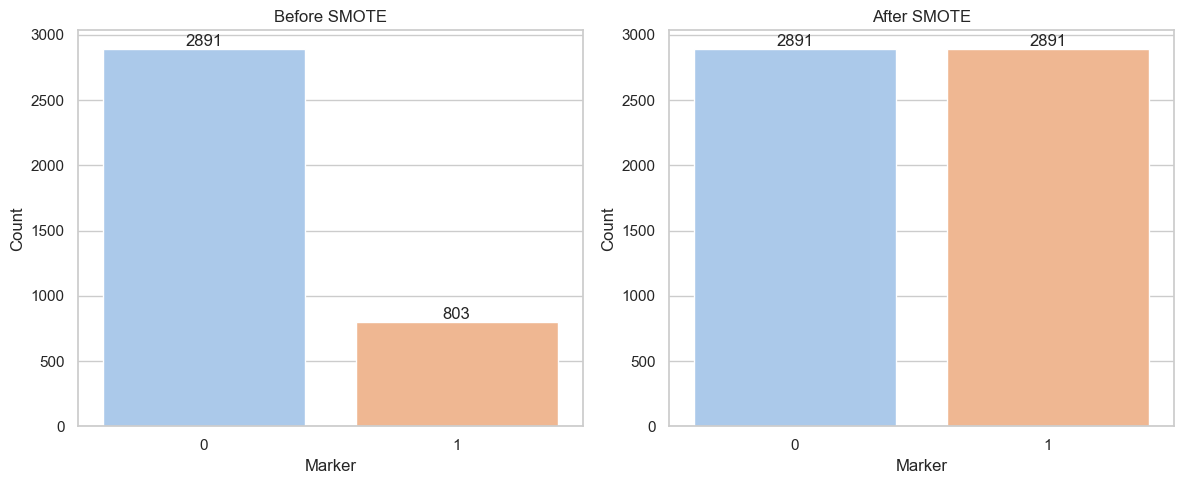

In [51]:
# Set style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Marker")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

# After SMOTE
sns.countplot(x=y_train_res, ax=axes[1], palette='pastel')
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Marker")
axes[1].set_ylabel("Count")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

# Correlation Matrix

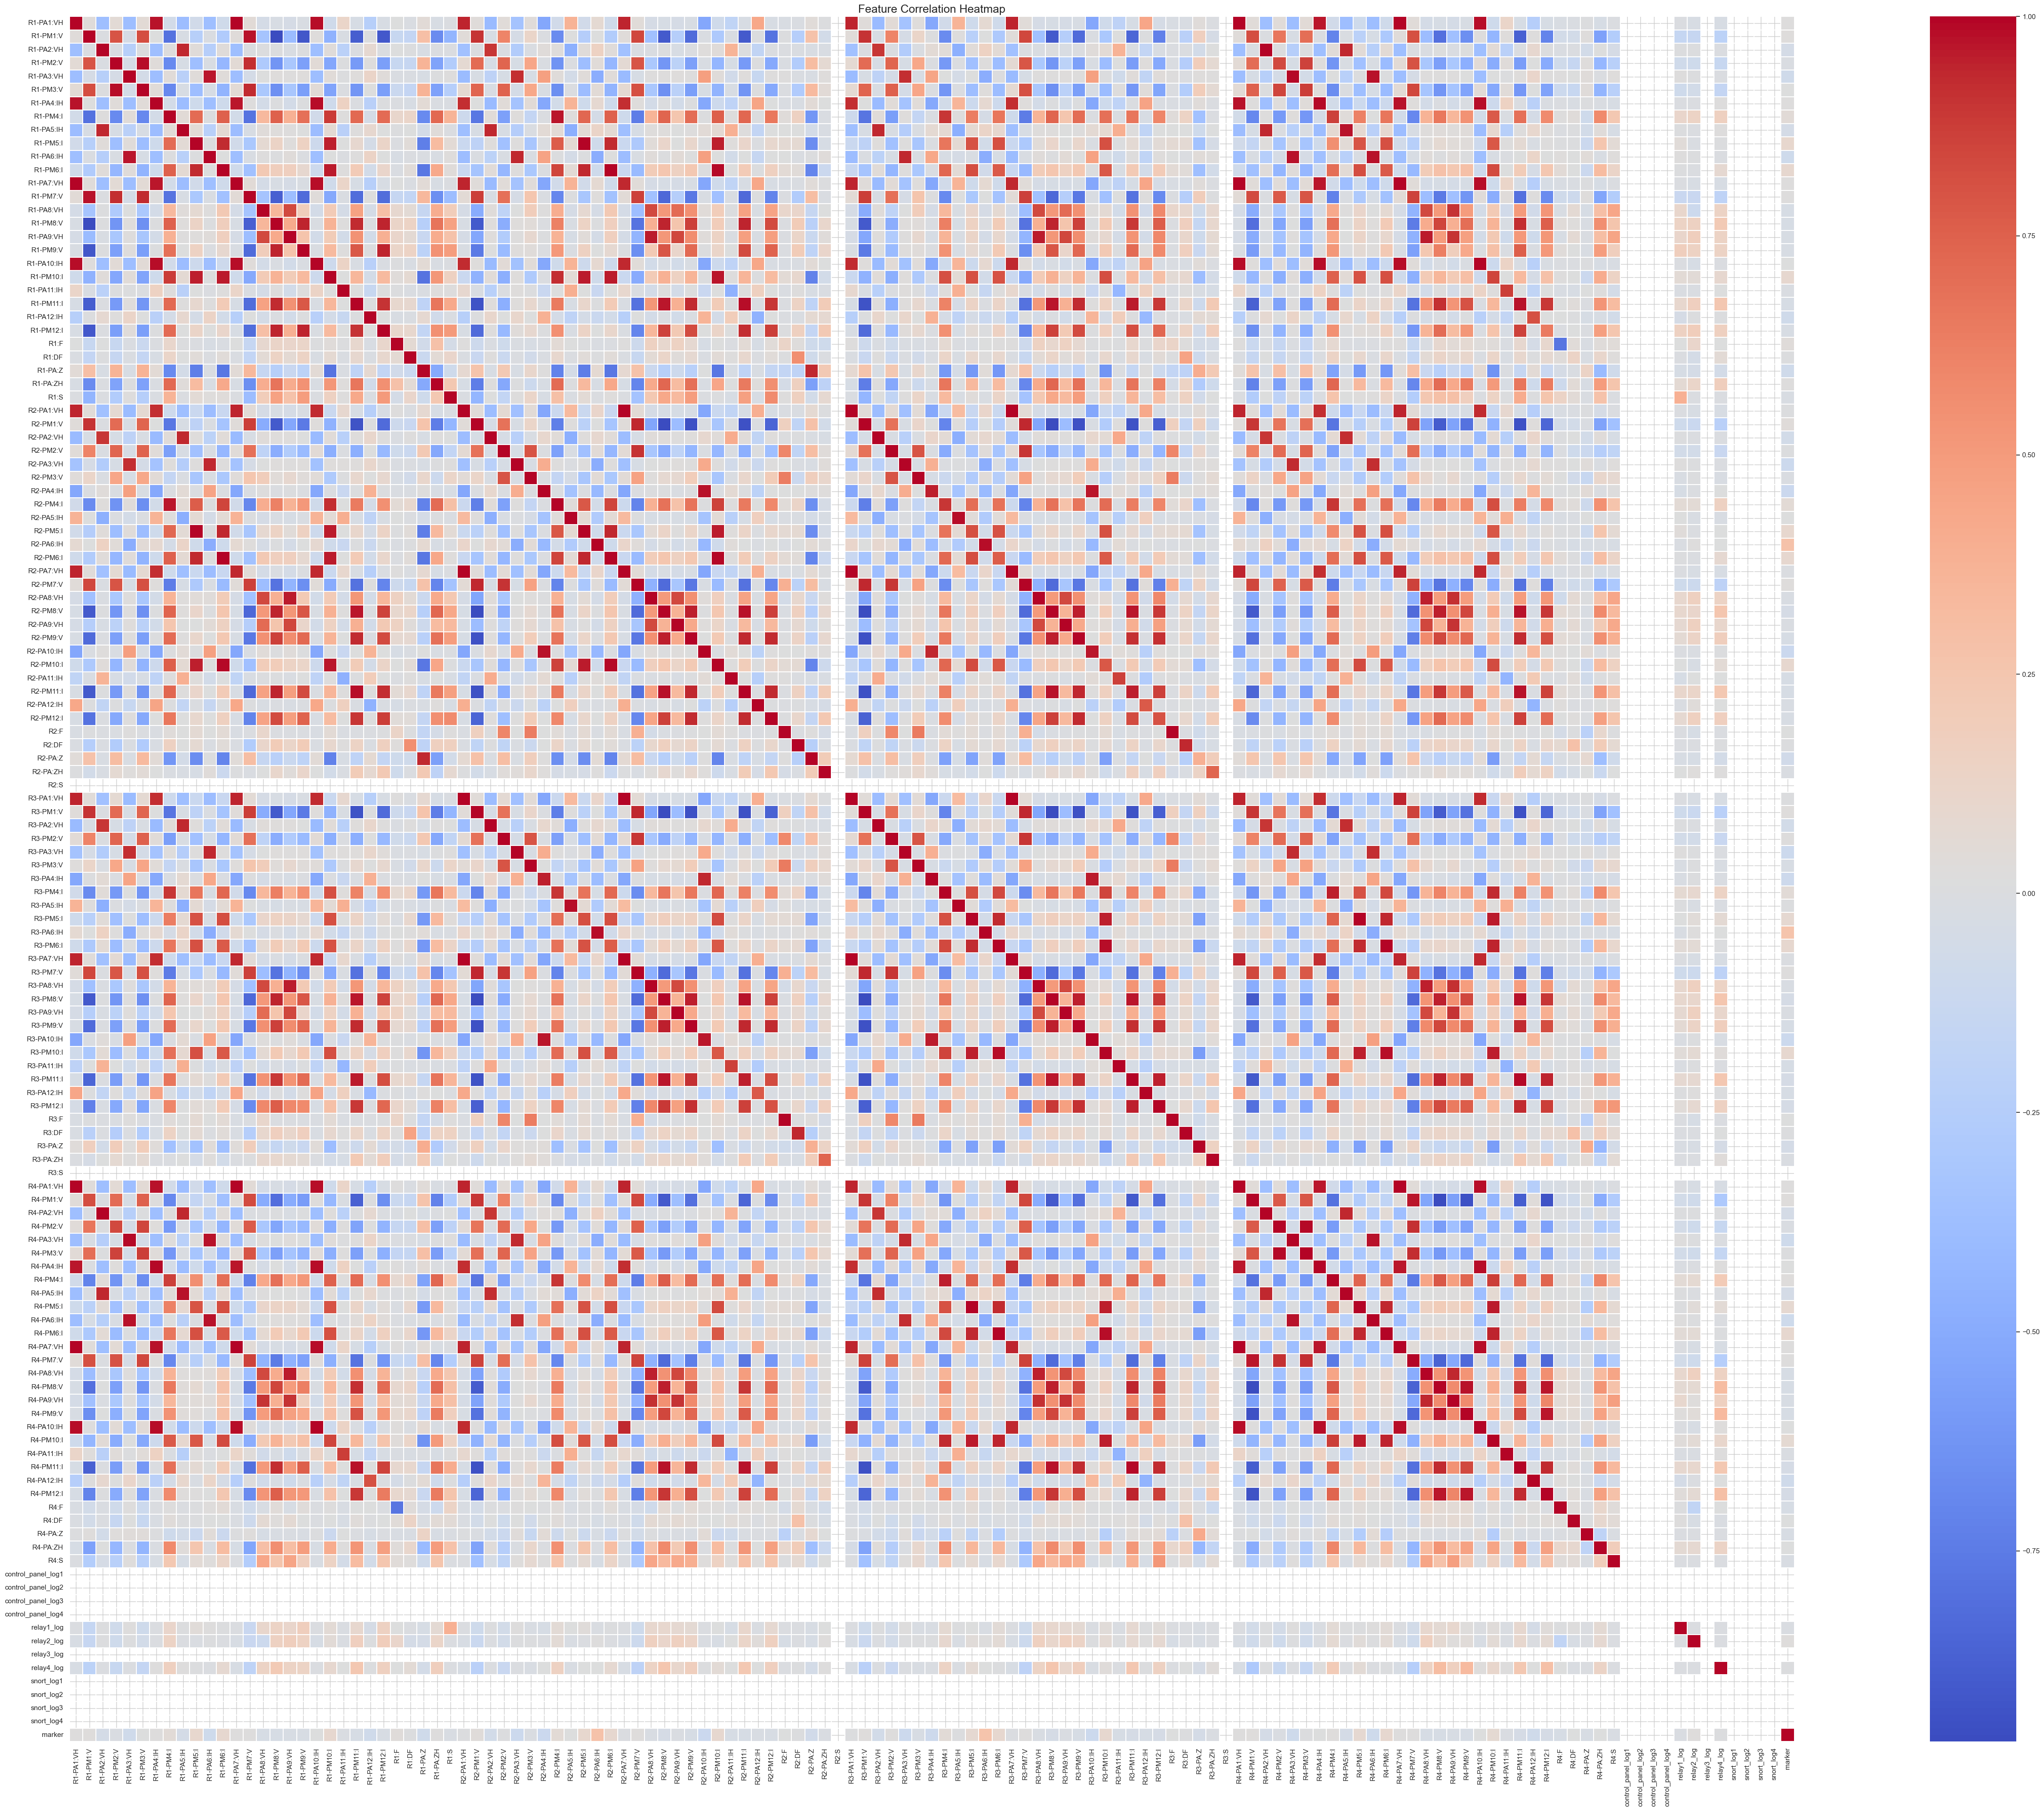

In [52]:
# Compute correlation matrix
corr_matrix = df.corr()

# Save correlation matrix to Excel
corr_matrix.to_excel("correlation_matrix.xlsx", index=True)

# Plot heatmap and save as JPG
plt.figure(figsize=(60, 40))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True, linewidths=0.3)

plt.title('Feature Correlation Heatmap', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap as a JPG image
plt.savefig("correlation_heatmap.jpg", dpi=300)

# Show the heatmap
plt.show()

# 1. Extra Trees Classifier

 Train set score: 100.00
 Accuracy Score : 97.29
 Precision Score: 92.86
 Recall Score   : 95.12
 f1 Score       : 93.98 

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       719
           1       0.93      0.95      0.94       205

    accuracy                           0.97       924
   macro avg       0.96      0.97      0.96       924
weighted avg       0.97      0.97      0.97       924
 

 Confusion Matrix:
 [[704  15]
 [ 10 195]]


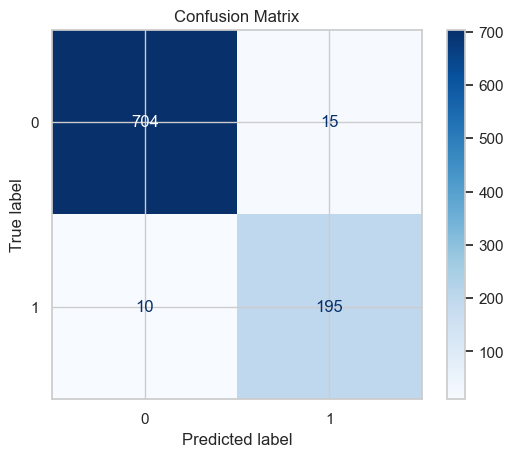

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier

# Train the model
extra_trees_classifier = ExtraTreesClassifier()
extra_trees_classifier.fit(X_train_res, y_train_res)

# Predictions
y_pred_extra_trees_classifier = extra_trees_classifier.predict(X_test)

# Accuracy Score
acc_extra_trees_classifier = round(accuracy_score(y_test, y_pred_extra_trees_classifier) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(round(extra_trees_classifier.score(X_train_res, y_train_res) * 100, 2)))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(acc_extra_trees_classifier))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(round(precision_score(y_test, y_pred_extra_trees_classifier) * 100, 2)))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(round(recall_score(y_test, y_pred_extra_trees_classifier) * 100, 2)))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(round(f1_score(y_test, y_pred_extra_trees_classifier) * 100, 2)), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_extra_trees_classifier), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_extra_trees_classifier)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay.from_estimator(extra_trees_classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [60]:
feature_names = X.columns

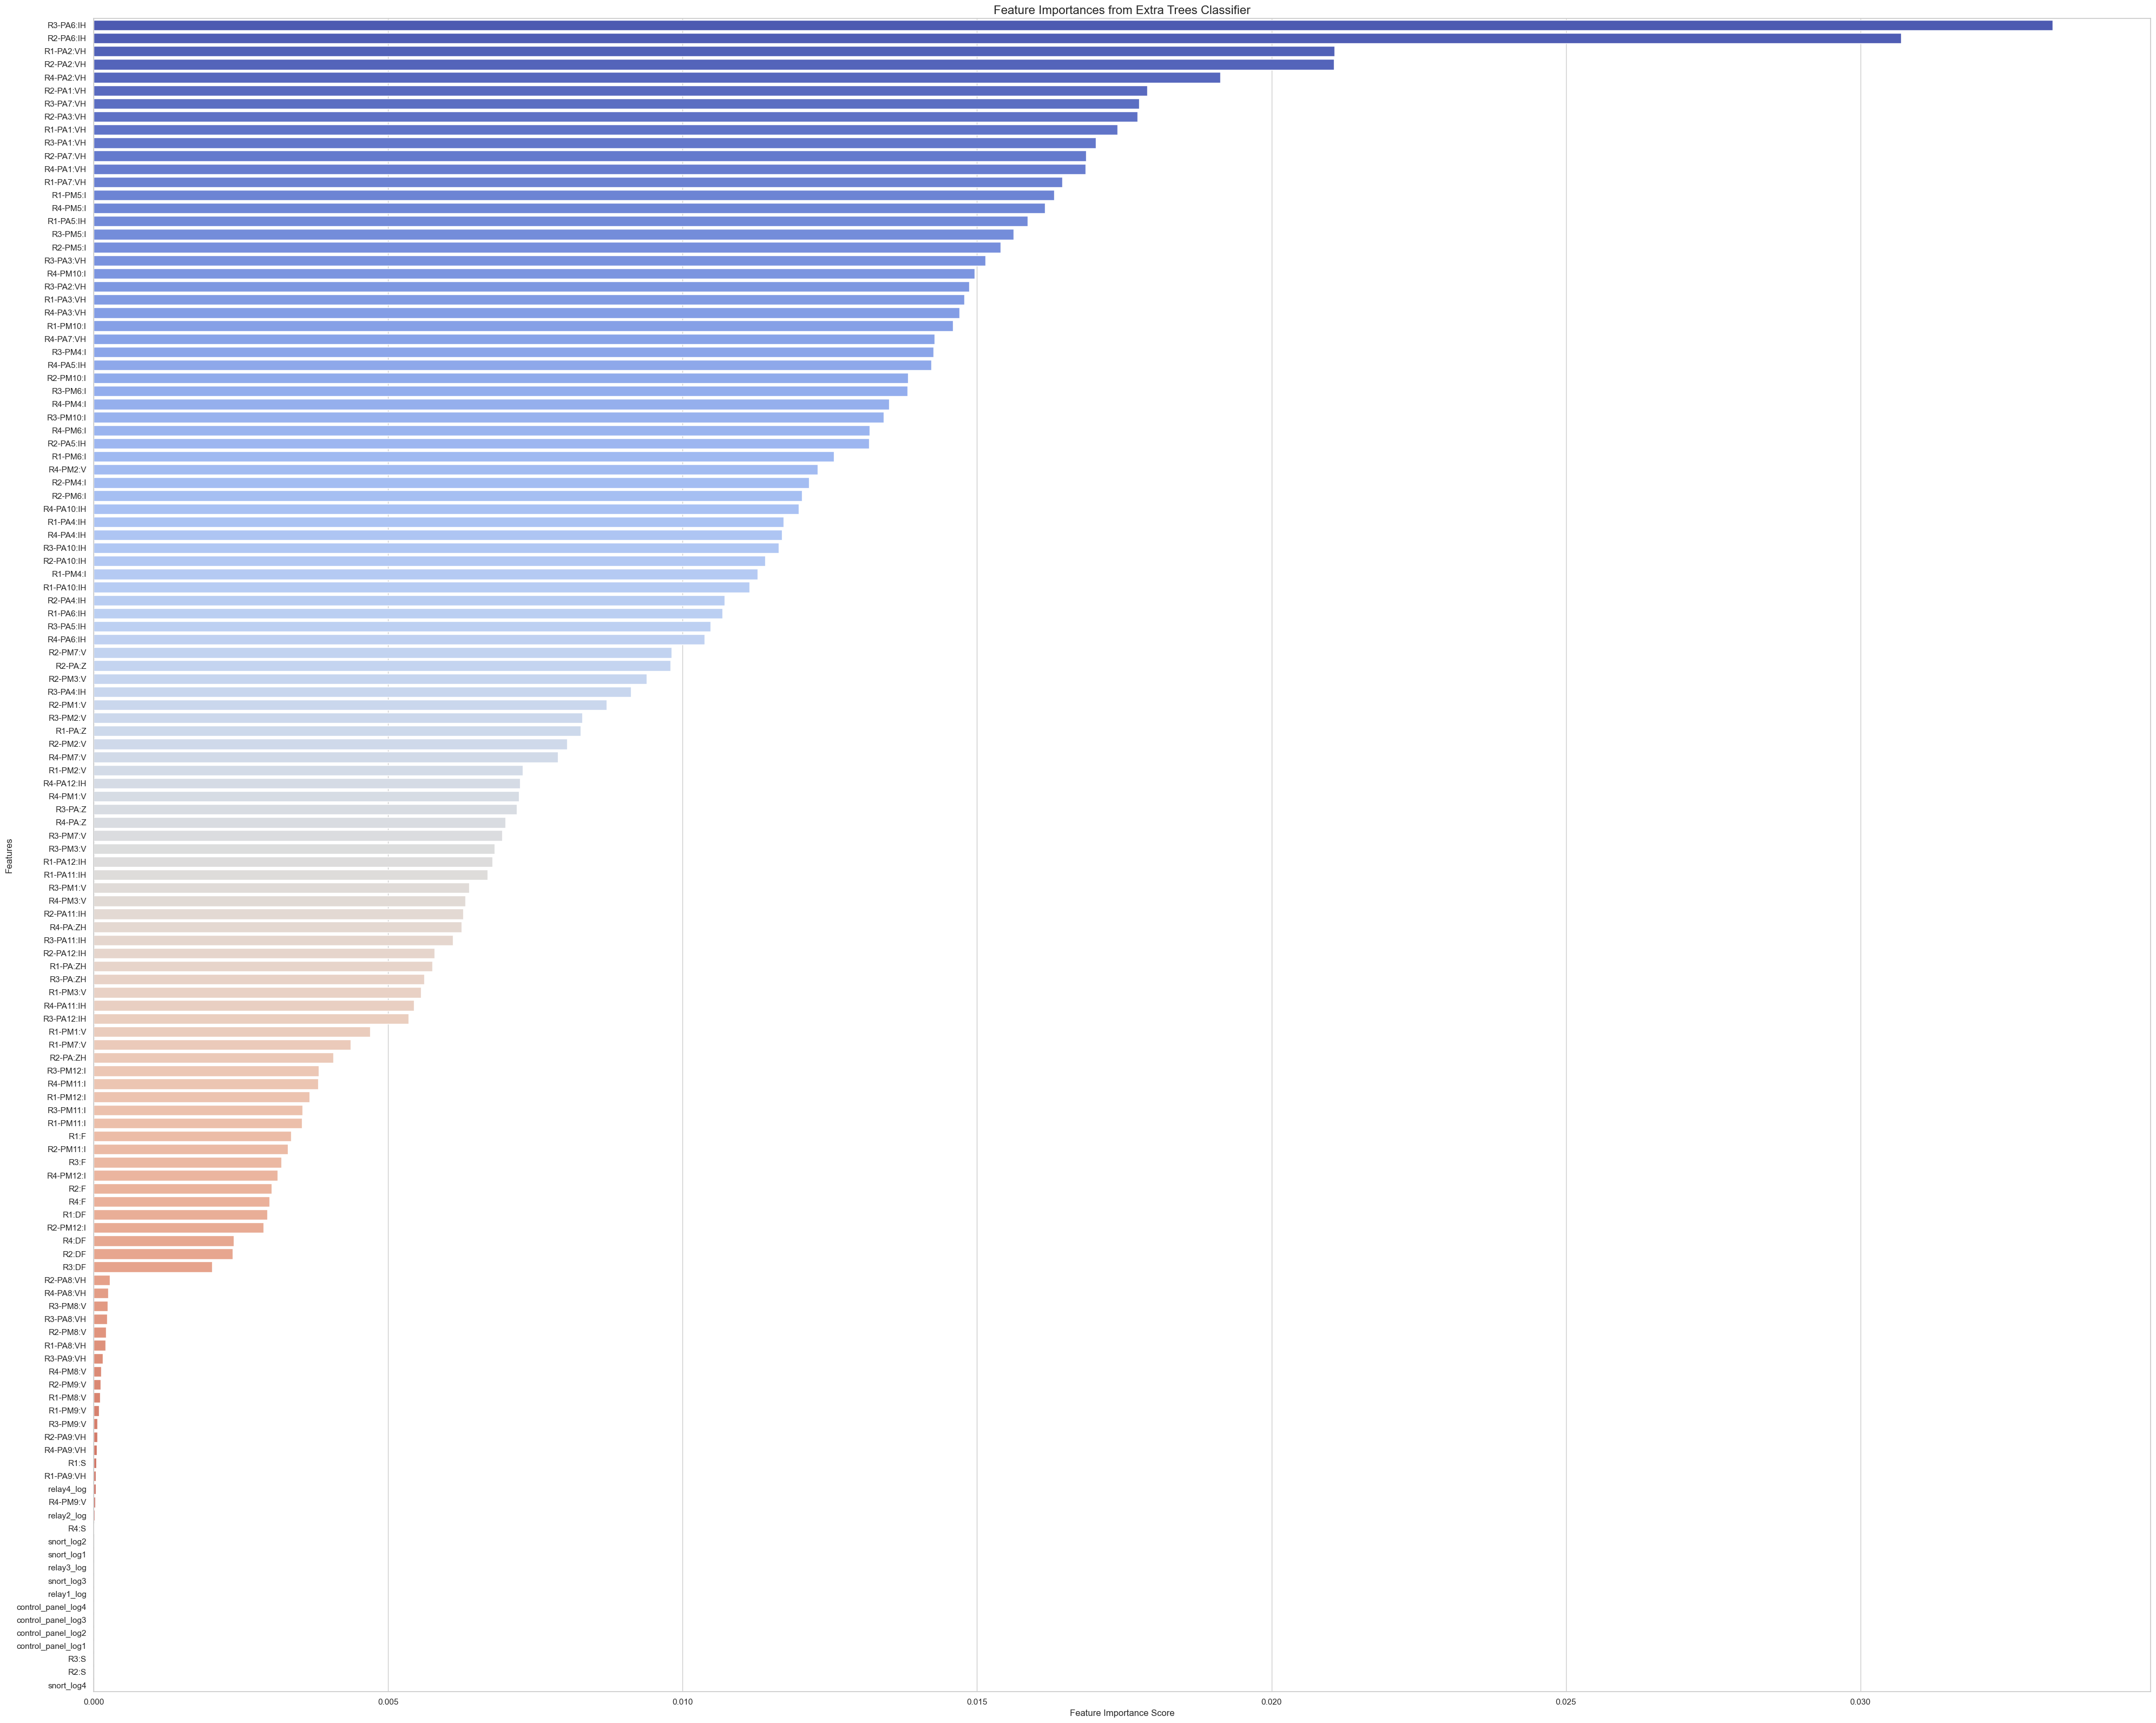

In [62]:
# Feature Importance Plot (Extra Trees Classifier)
importances = extra_trees_classifier.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(40, 32))
plt.title("Feature Importances from Extra Trees Classifier", fontsize=16)
sns.barplot(x=importances[indices], y=sorted_features, palette='coolwarm')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 2. Random Forest Classifier

 Train set score: 100.00
 Accuracy Score : 96.21
 Precision Score: 91.26
 Recall Score   : 91.71
 f1 Score       : 91.48 

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       719
           1       0.91      0.92      0.91       205

    accuracy                           0.96       924
   macro avg       0.94      0.95      0.95       924
weighted avg       0.96      0.96      0.96       924
 

 Confusion Matrix:
 [[701  18]
 [ 17 188]]


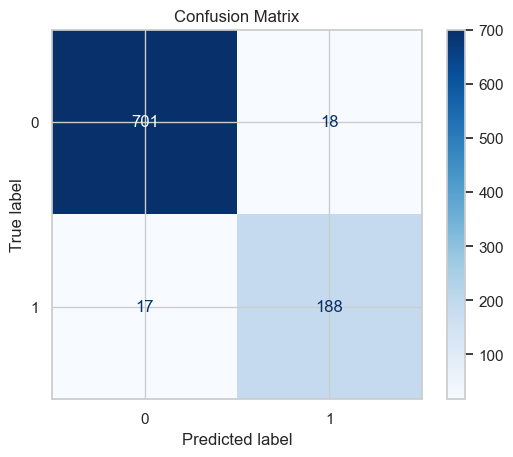

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_res, y_train_res)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Accuracy Score
acc_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(round(rf_classifier.score(X_train_res, y_train_res) * 100, 2)))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(acc_rf))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(round(precision_score(y_test, y_pred_rf) * 100, 2)))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(round(recall_score(y_test, y_pred_rf) * 100, 2)))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(round(f1_score(y_test, y_pred_rf) * 100, 2)), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_rf), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

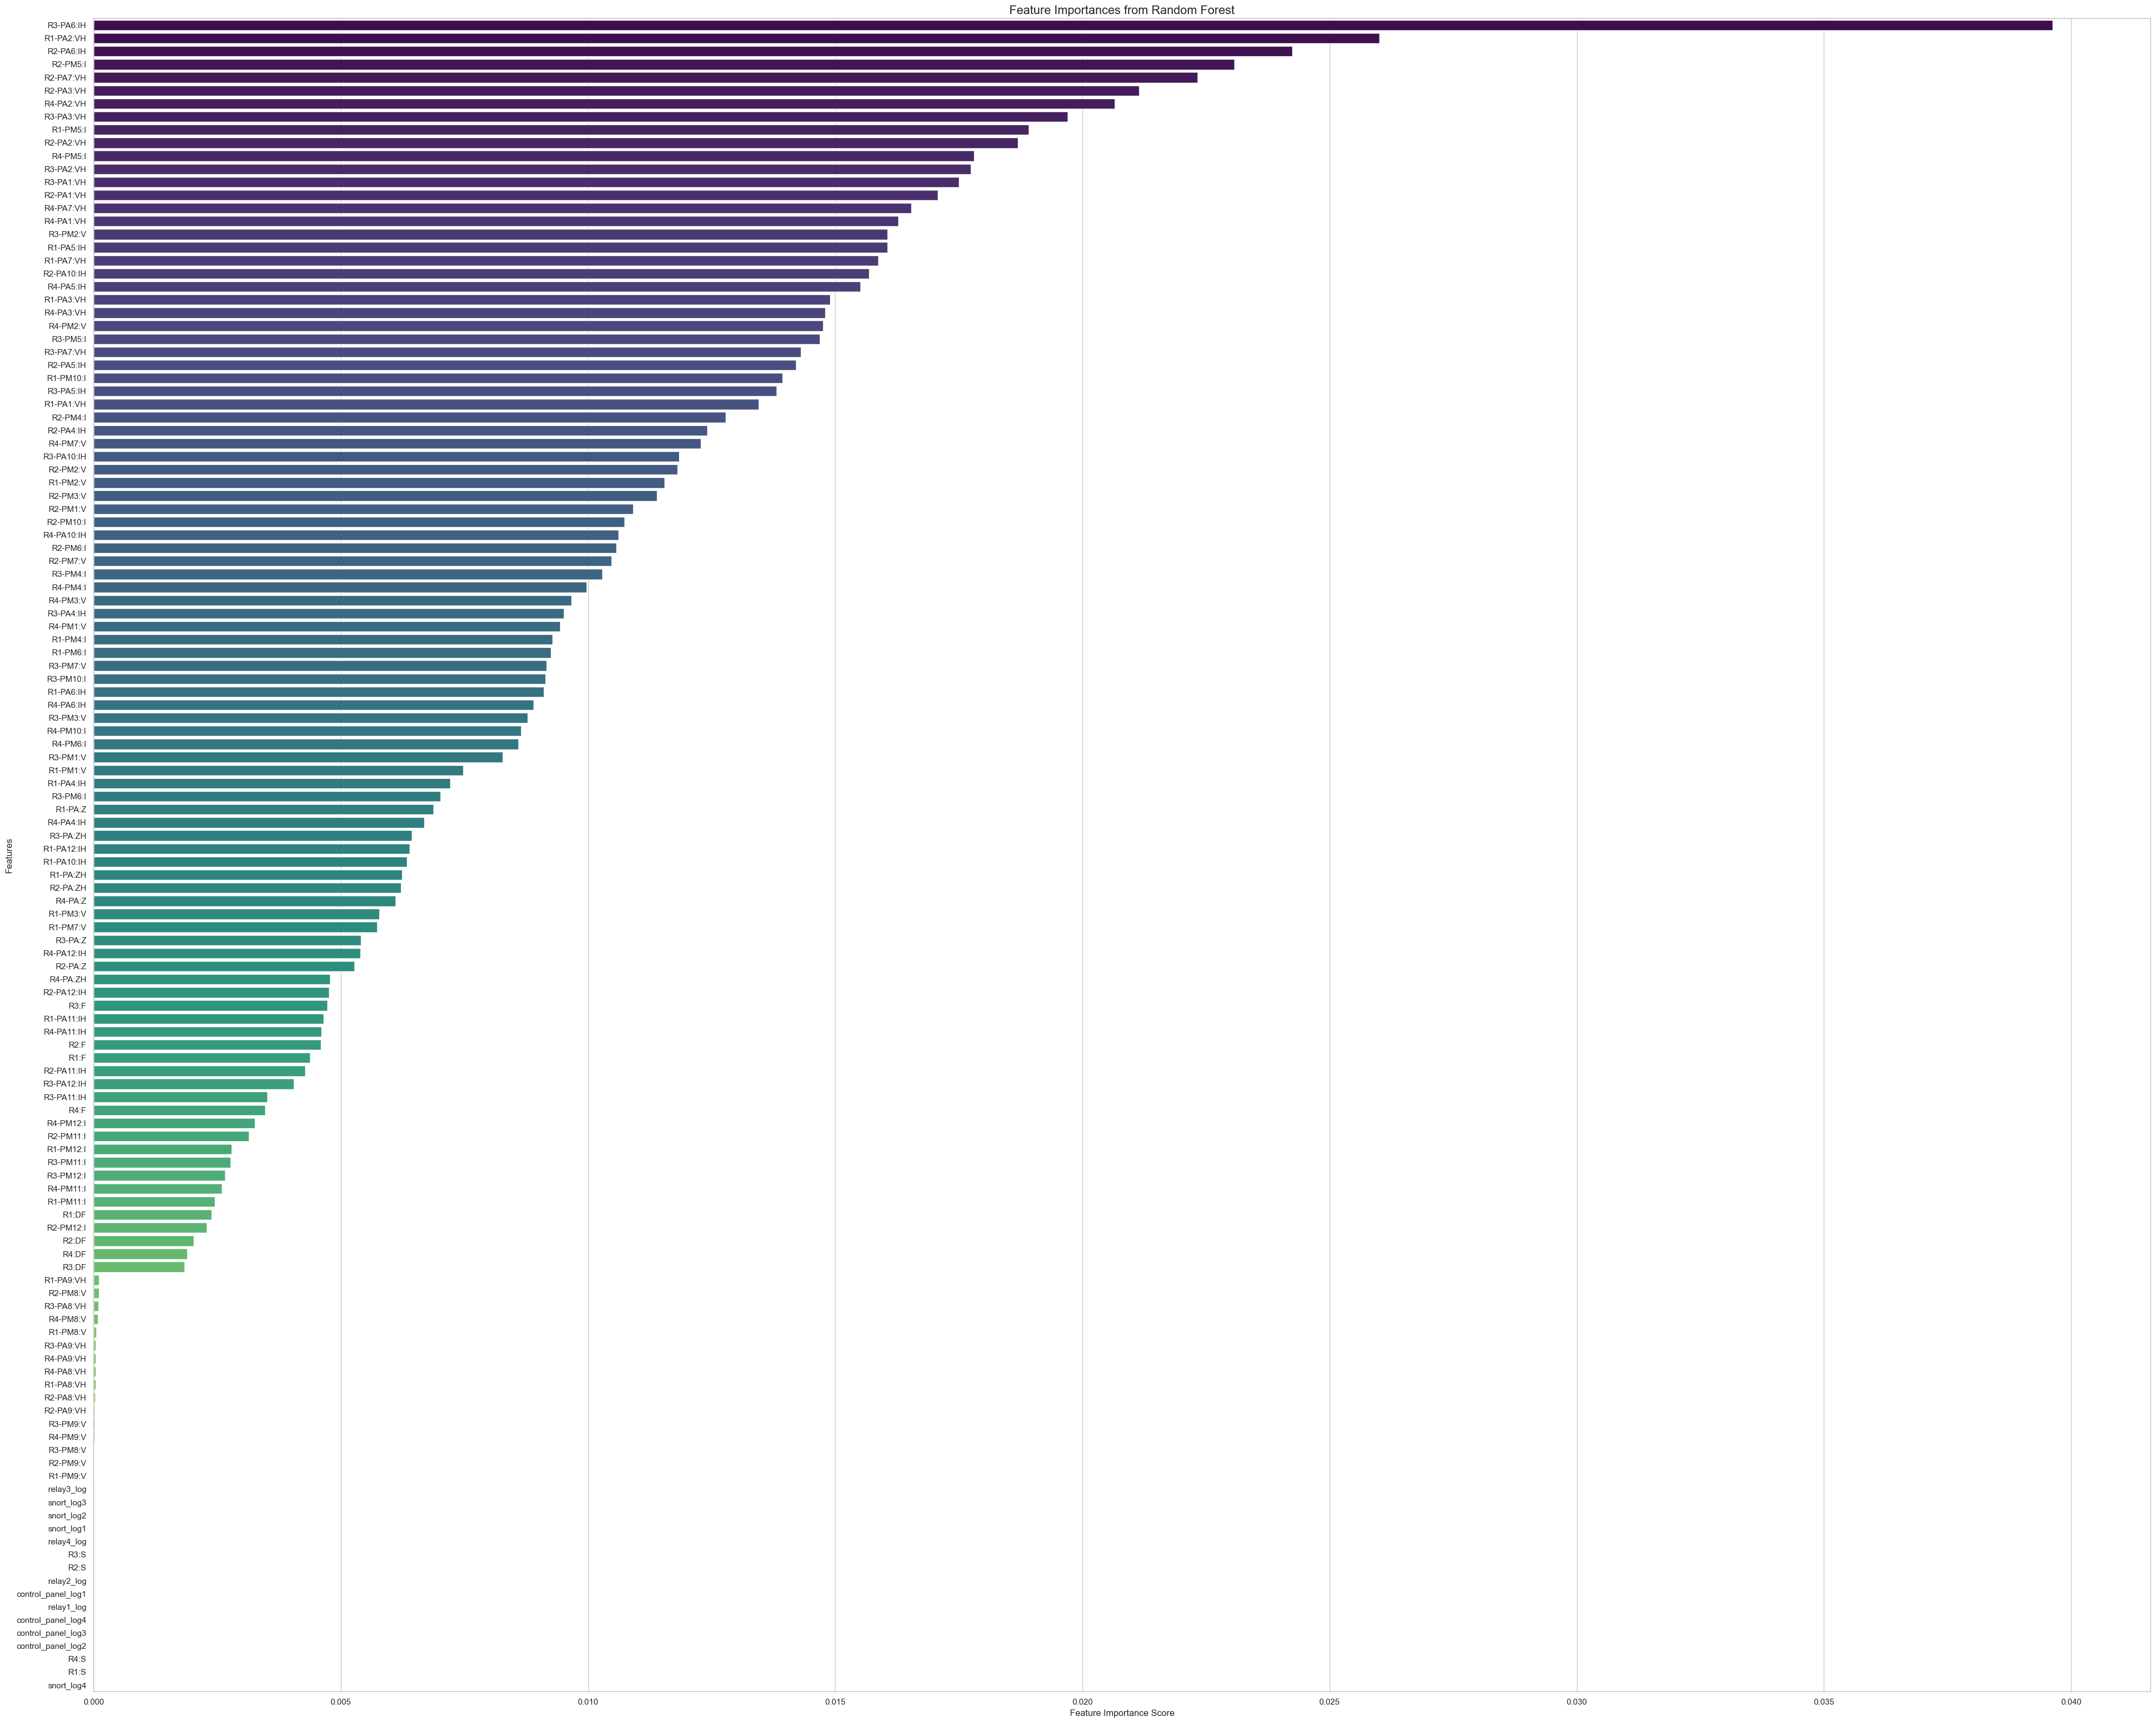

In [64]:
# Feature Importance Plot (Random Forest)
importances = rf_classifier.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(40, 32))
plt.title("Feature Importances from Random Forest", fontsize=16)
sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# 3. XGB Classifier

In [65]:
!pip install xgboost

 Train set score: 100.00
 Accuracy Score : 96.75
 Precision Score: 92.68
 Recall Score   : 92.68
 f1 Score       : 92.68 

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       719
           1       0.93      0.93      0.93       205

    accuracy                           0.97       924
   macro avg       0.95      0.95      0.95       924
weighted avg       0.97      0.97      0.97       924
 

 Confusion Matrix:
 [[704  15]
 [ 15 190]]


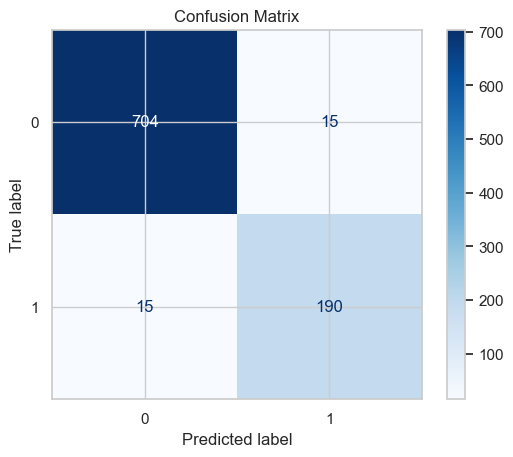

In [66]:
from xgboost import XGBClassifier

# Initialize and train XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Accuracy Score
acc_xgb = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(round(xgb_clf.score(X_train_res, y_train_res) * 100, 2)))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(acc_xgb))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(round(precision_score(y_test, y_pred_xgb) * 100, 2)))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(round(recall_score(y_test, y_pred_xgb) * 100, 2)))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(round(f1_score(y_test, y_pred_xgb) * 100, 2)), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_xgb), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

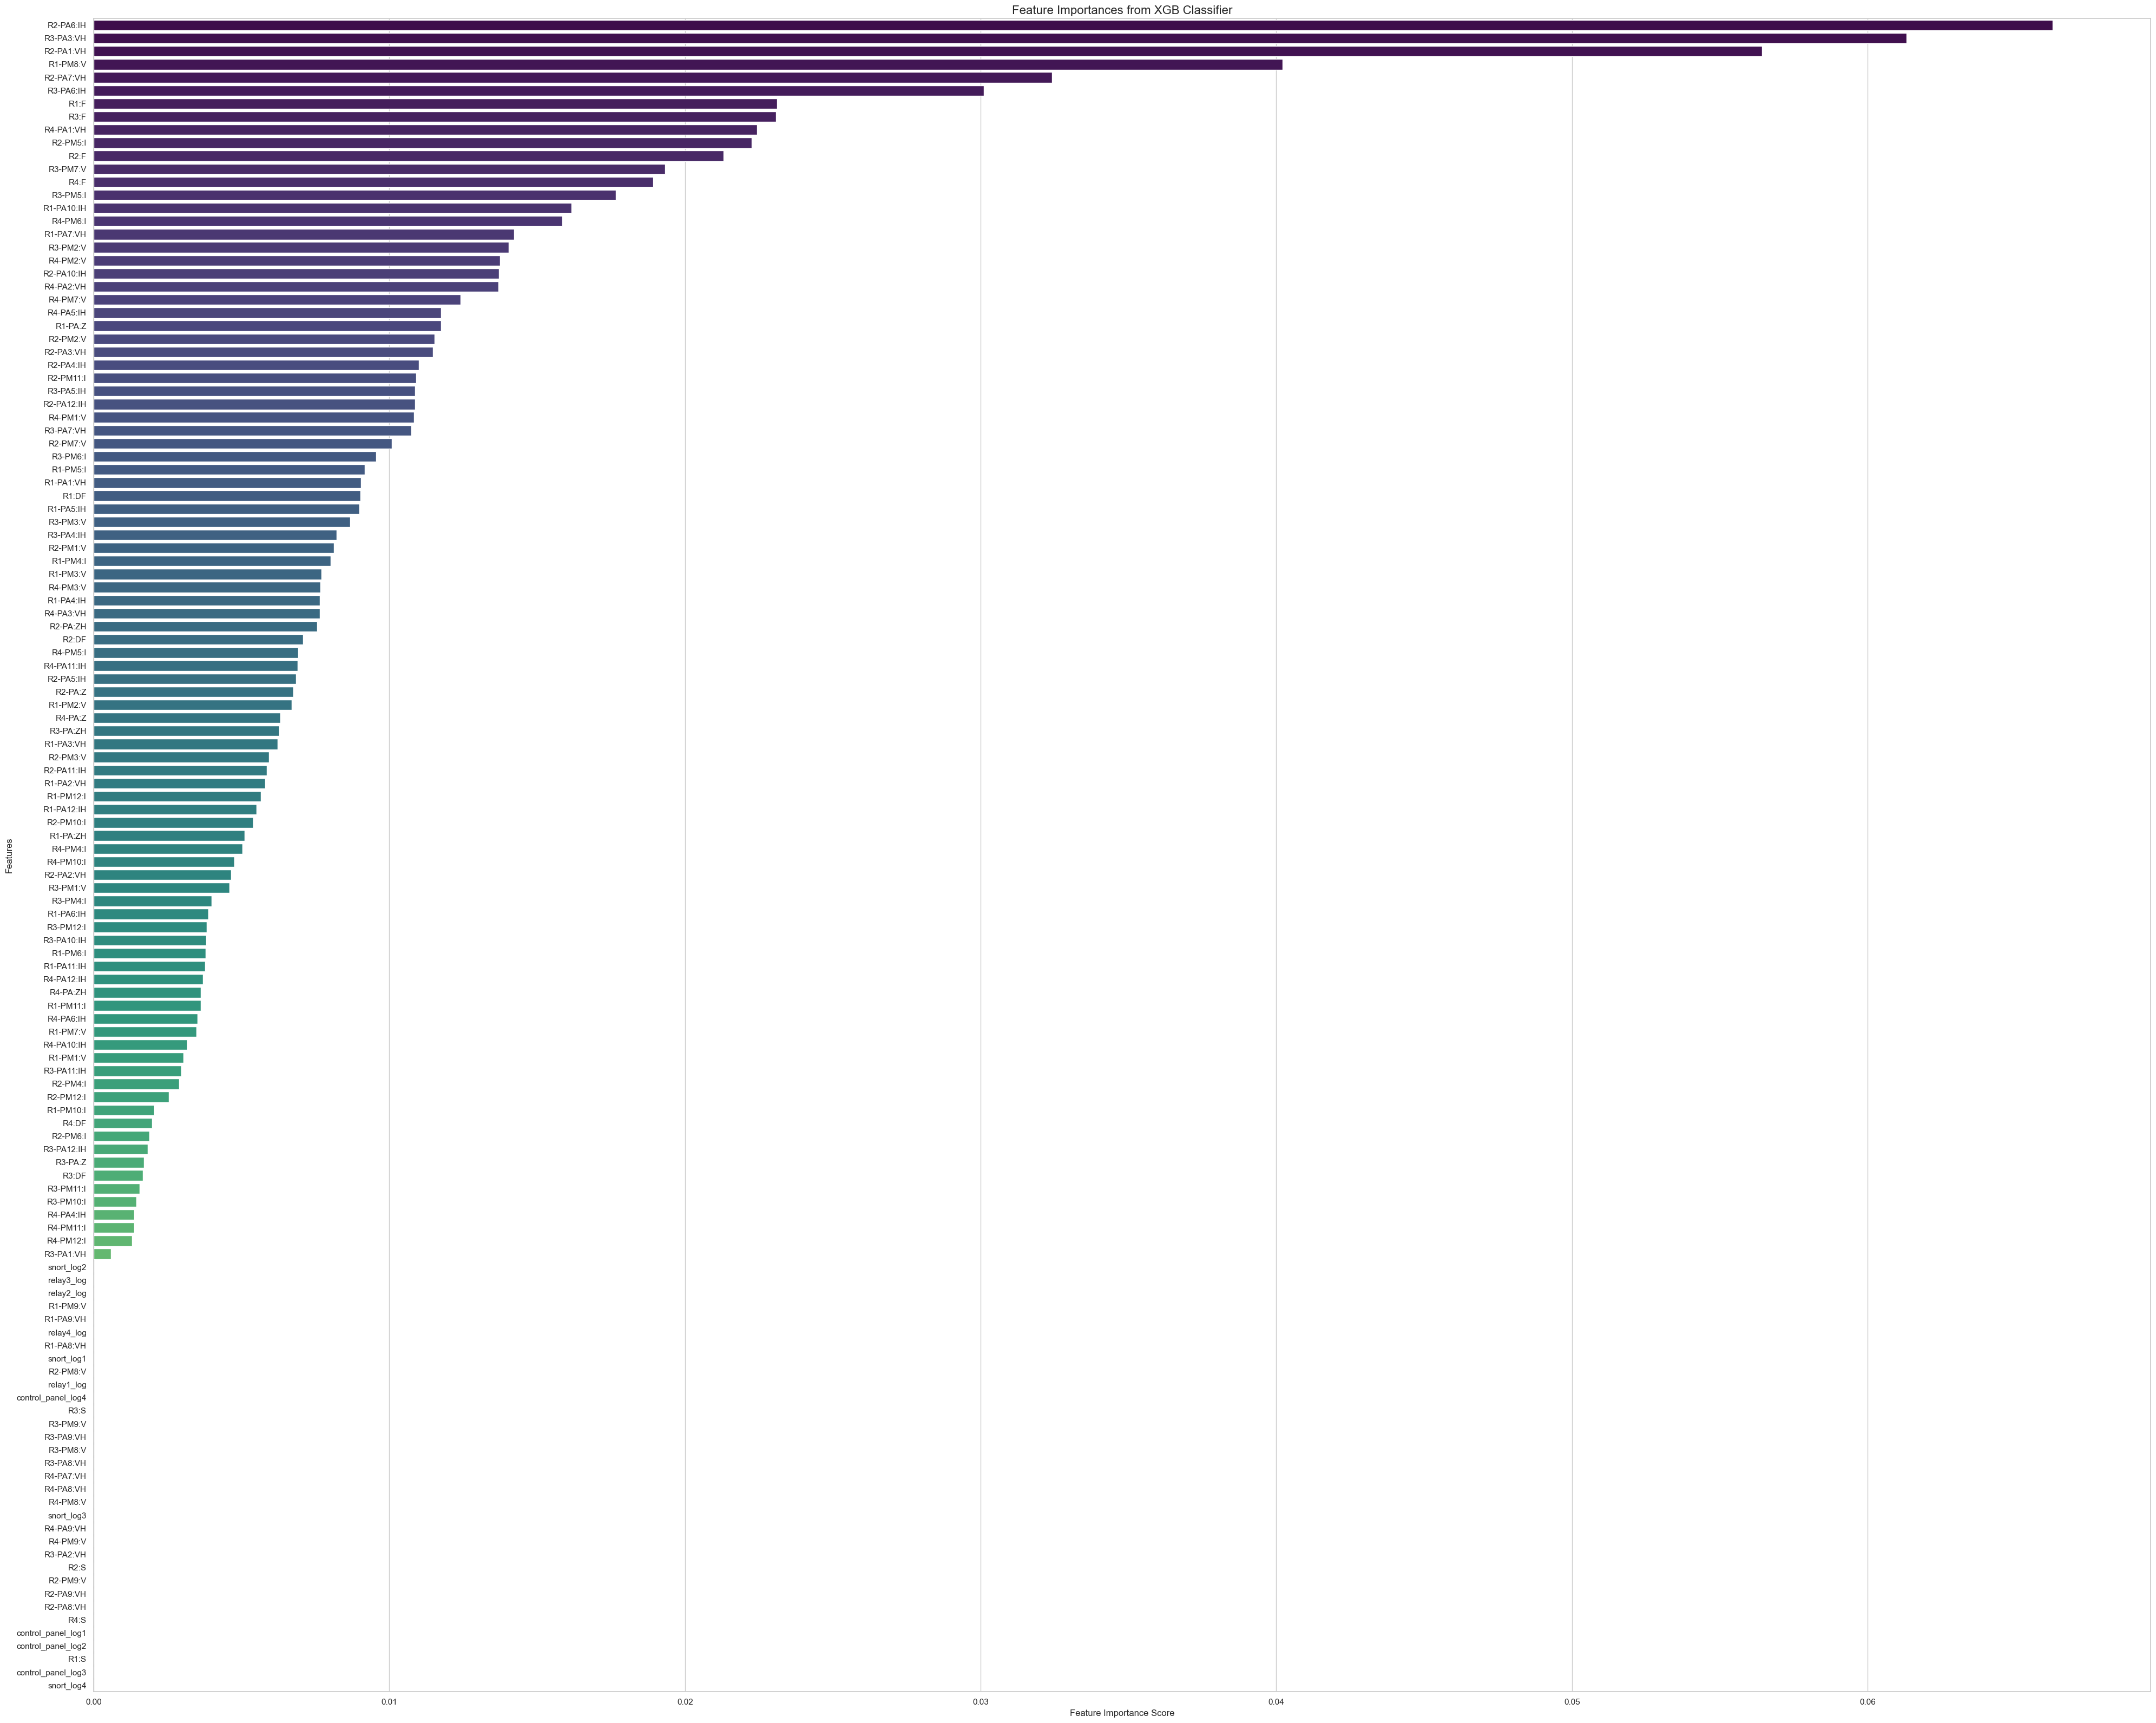

In [67]:
# Feature Importance Plot (XGB Classifier)
importances = xgb_clf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(40, 32))
plt.title("Feature Importances from XGB Classifier", fontsize=16)
sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 4. Bagging Classifier

 Train set score: 99.83
 Accuracy Score : 94.81
 Precision Score: 88.67
 Recall Score   : 87.80
 f1 Score       : 88.24 

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       719
           1       0.89      0.88      0.88       205

    accuracy                           0.95       924
   macro avg       0.93      0.92      0.92       924
weighted avg       0.95      0.95      0.95       924
 

 Confusion Matrix:
 [[696  23]
 [ 25 180]]


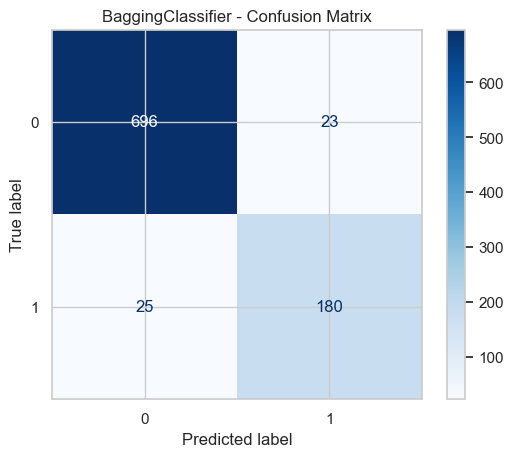

In [68]:
from sklearn.ensemble import BaggingClassifier

# Model Initialization & Training
bagging_model = BaggingClassifier()
bagging_model.fit(X_train_res, y_train_res)

# Prediction
y_pred_bagging = bagging_model.predict(X_test)
acc_bagging = round(accuracy_score(y_test, y_pred_bagging) * 100, 2)

# Metrics
print(f"\033[031m\033[1m", "Train set score: {:.2f}".format(round(bagging_model.score(X_train_res, y_train_res) * 100, 2)))
print(f"\033[031m\033[1m", "Accuracy Score : {:.2f}".format(acc_bagging))
print(f"\033[031m\033[1m", "Precision Score: {:.2f}".format(round(precision_score(y_test, y_pred_bagging) * 100, 2)))
print(f"\033[031m\033[1m", "Recall Score   : {:.2f}".format(round(recall_score(y_test, y_pred_bagging) * 100, 2)))
print(f"\033[031m\033[1m", "f1 Score       : {:.2f}".format(round(f1_score(y_test, y_pred_bagging) * 100, 2)), '\n')

# Classification Report
print(f"\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_bagging), '\n')

print(f"\033[034m\033[1m", "Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))

# Confusion Matrix Display
ConfusionMatrixDisplay.from_estimator(bagging_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('BaggingClassifier - Confusion Matrix')
plt.show()

# 5. Logistic Regression Classifier

 Train set score : 78.42
 Accuracy Score  : 68.83
 Precision Score : 40.37
 Recall Score    : 84.88
 F1 Score        : 54.72

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       719
           1       0.40      0.85      0.55       205

    accuracy                           0.69       924
   macro avg       0.67      0.75      0.65       924
weighted avg       0.82      0.69      0.71       924


 Confusion Matrix:
[[462 257]
 [ 31 174]]


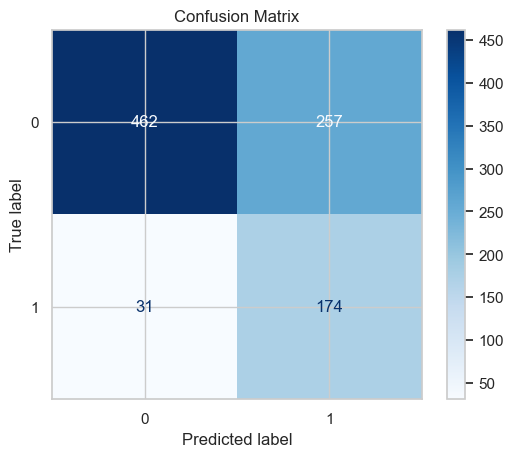

In [69]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)

# Predictions
y_pred_LogisticRegression = log_reg.predict(X_test)

# Evaluation metrics
print(f"\033[031m\033[1m Train set score : {round(log_reg.score(X_train_res, y_train_res) * 100, 2)}")
print(f"\033[031m\033[1m Accuracy Score  : {round(accuracy_score(y_test, y_pred_LogisticRegression) * 100, 2)}")
print(f"\033[031m\033[1m Precision Score : {round(precision_score(y_test, y_pred_LogisticRegression) * 100, 2)}")
print(f"\033[031m\033[1m Recall Score    : {round(recall_score(y_test, y_pred_LogisticRegression) * 100, 2)}")
print(f"\033[031m\033[1m F1 Score        : {round(f1_score(y_test, y_pred_LogisticRegression) * 100, 2)}\n")

print(f"\033[032m\033[1m Classification Report:\n{classification_report(y_test, y_pred_LogisticRegression)}\n")
print(f"\033[034m\033[1m Confusion Matrix:\n{confusion_matrix(y_test, y_pred_LogisticRegression)}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# 6. Decision Tree

 Train set score : 75.63
 Accuracy Score  : 63.85
 Precision Score : 37.52
 Recall Score    : 94.63
 F1 Score        : 53.74

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.55      0.70       719
           1       0.38      0.95      0.54       205

    accuracy                           0.64       924
   macro avg       0.67      0.75      0.62       924
weighted avg       0.84      0.64      0.67       924


 Confusion Matrix:
[[396 323]
 [ 11 194]]


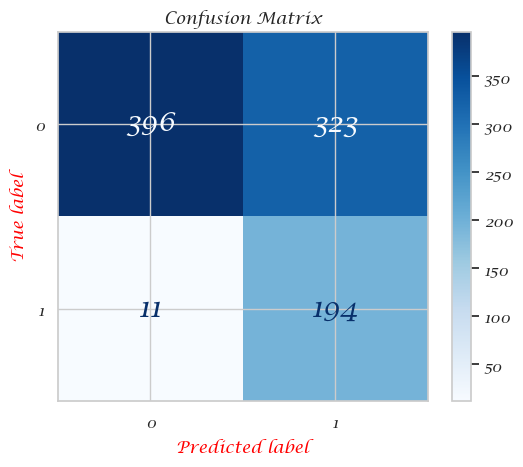

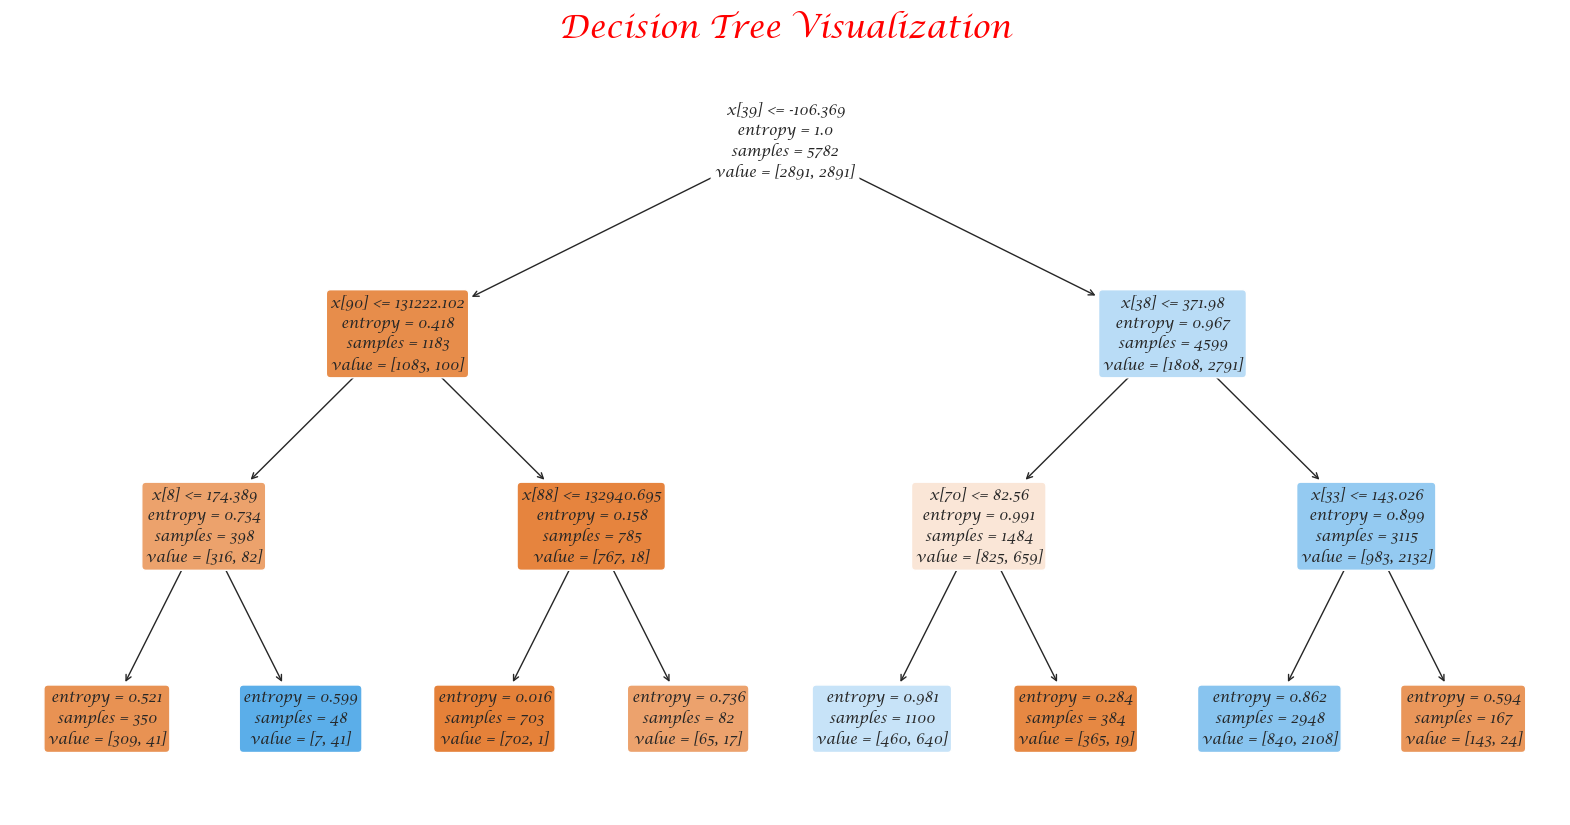

In [70]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Style settings
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Lucida Calligraphy'  
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams["axes.labelcolor"] = 'red'

# Create and train Decision Tree classifier
dec = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dec.fit(X_train_res, y_train_res)

# Predictions
y_pred_decision_tree = dec.predict(X_test)

# Evaluation metrics
print(f"\033[031m\033[1m Train set score : {round(dec.score(X_train_res, y_train_res) * 100, 2)}")
print(f"\033[031m\033[1m Accuracy Score  : {round(accuracy_score(y_test, y_pred_decision_tree) * 100, 2)}")
print(f"\033[031m\033[1m Precision Score : {round(precision_score(y_test, y_pred_decision_tree) * 100, 2)}")
print(f"\033[031m\033[1m Recall Score    : {round(recall_score(y_test, y_pred_decision_tree) * 100, 2)}")
print(f"\033[031m\033[1m F1 Score        : {round(f1_score(y_test, y_pred_decision_tree) * 100, 2)}\n")

print(f"\033[032m\033[1m Classification Report:\n{classification_report(y_test, y_pred_decision_tree)}\n")
print(f"\033[034m\033[1m Confusion Matrix:\n{confusion_matrix(y_test, y_pred_decision_tree)}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(dec, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot the Decision Tree
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(dec, fontsize=10, filled=True, rounded=True)
plt.title("Decision Tree Visualization", fontsize=22, color='red')
plt.show()

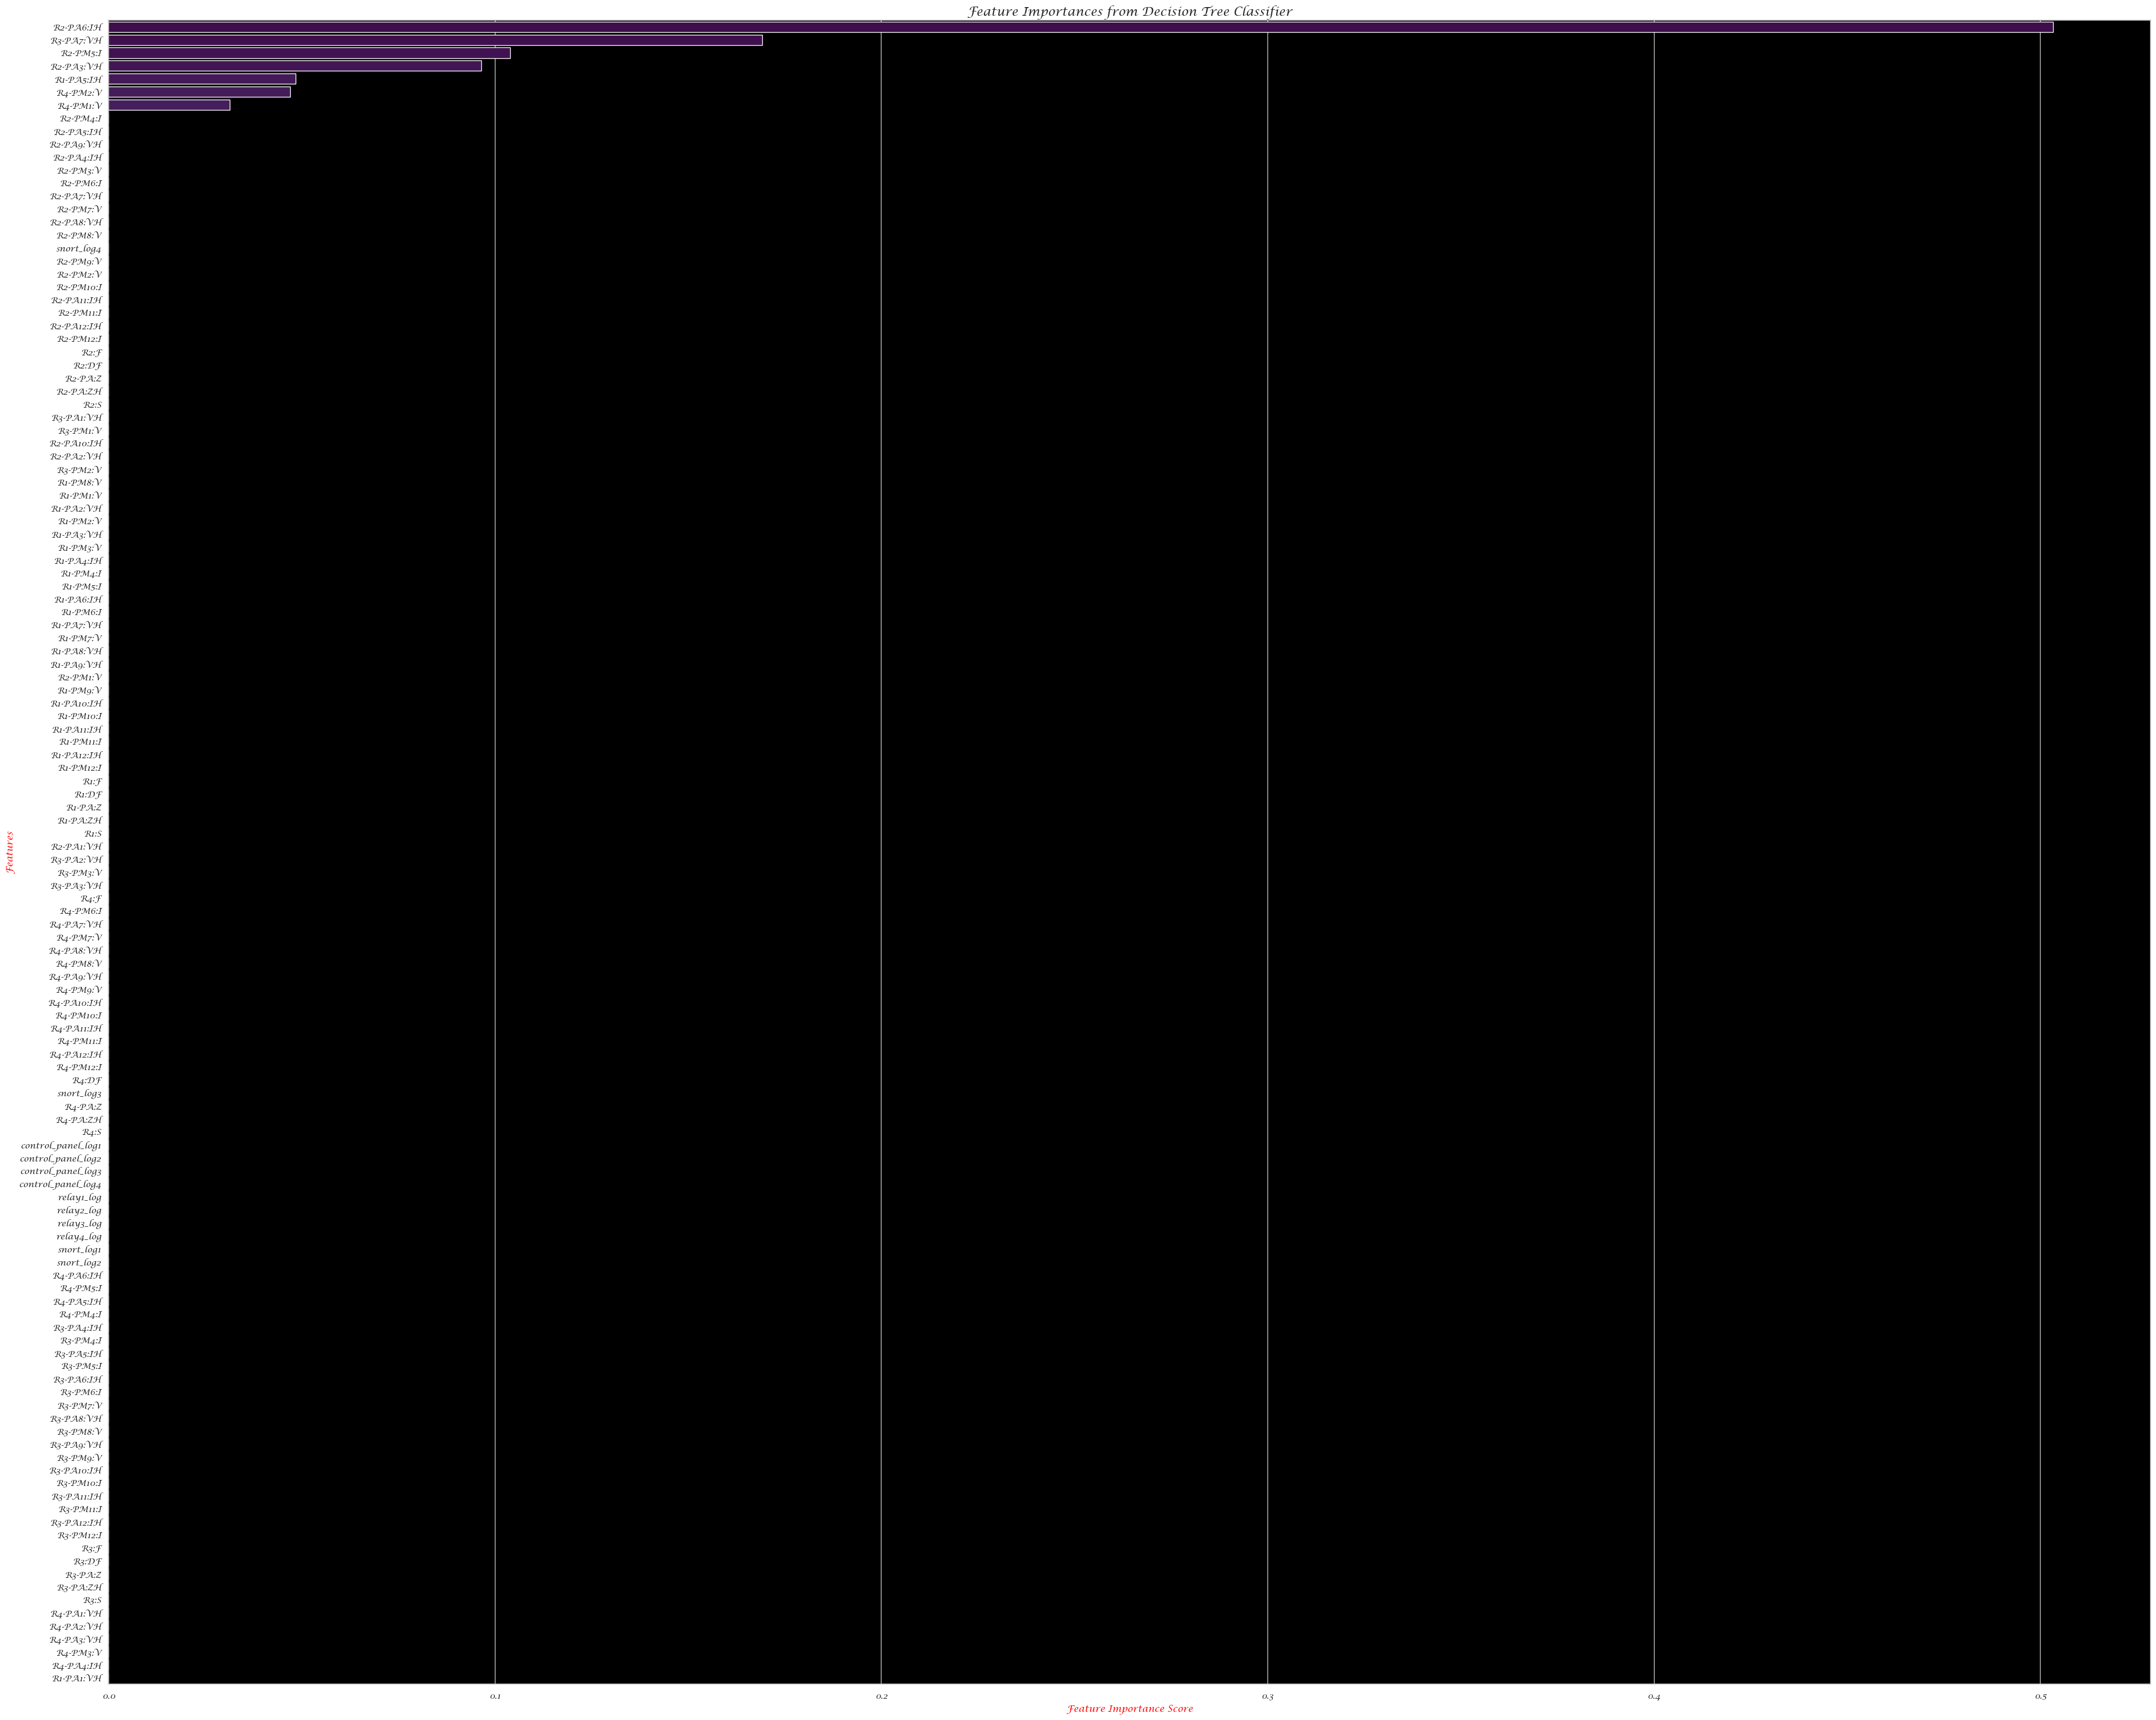

In [71]:
# Feature Importance Plot (Decision Tree Classifier)
importances = dec.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(40, 32))
plt.title("Feature Importances from Decision Tree Classifier", fontsize=16)
sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 7. AdaBoost Classifier

 Train set score: 86.11
 Accuracy Score : 80.41
 Precision Score: 54.05
 Recall Score   : 78.05
 f1 Score       : 63.87 

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       719
           1       0.54      0.78      0.64       205

    accuracy                           0.80       924
   macro avg       0.73      0.80      0.75       924
weighted avg       0.84      0.80      0.82       924
 

 Confusion Matrix:
 [[583 136]
 [ 45 160]]


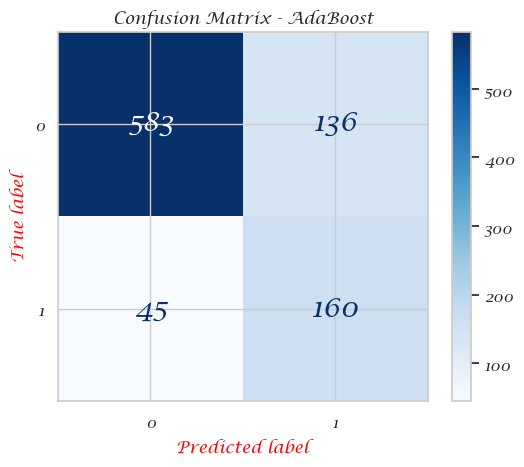

In [72]:
from sklearn.ensemble import AdaBoostClassifier

# Train the model
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train_res, y_train_res)

# Predictions
y_pred_AdaBoost = AdaBoost.predict(X_test)

# Accuracy Score
acc_AdaBoost = round(accuracy_score(y_test, y_pred_AdaBoost) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(AdaBoost.score(X_train_res, y_train_res) * 100))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_AdaBoost) * 100))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_AdaBoost) * 100))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_AdaBoost) * 100))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_AdaBoost) * 100), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_AdaBoost), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_AdaBoost)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Plot
disp = ConfusionMatrixDisplay.from_estimator(AdaBoost, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - AdaBoost')
plt.show()

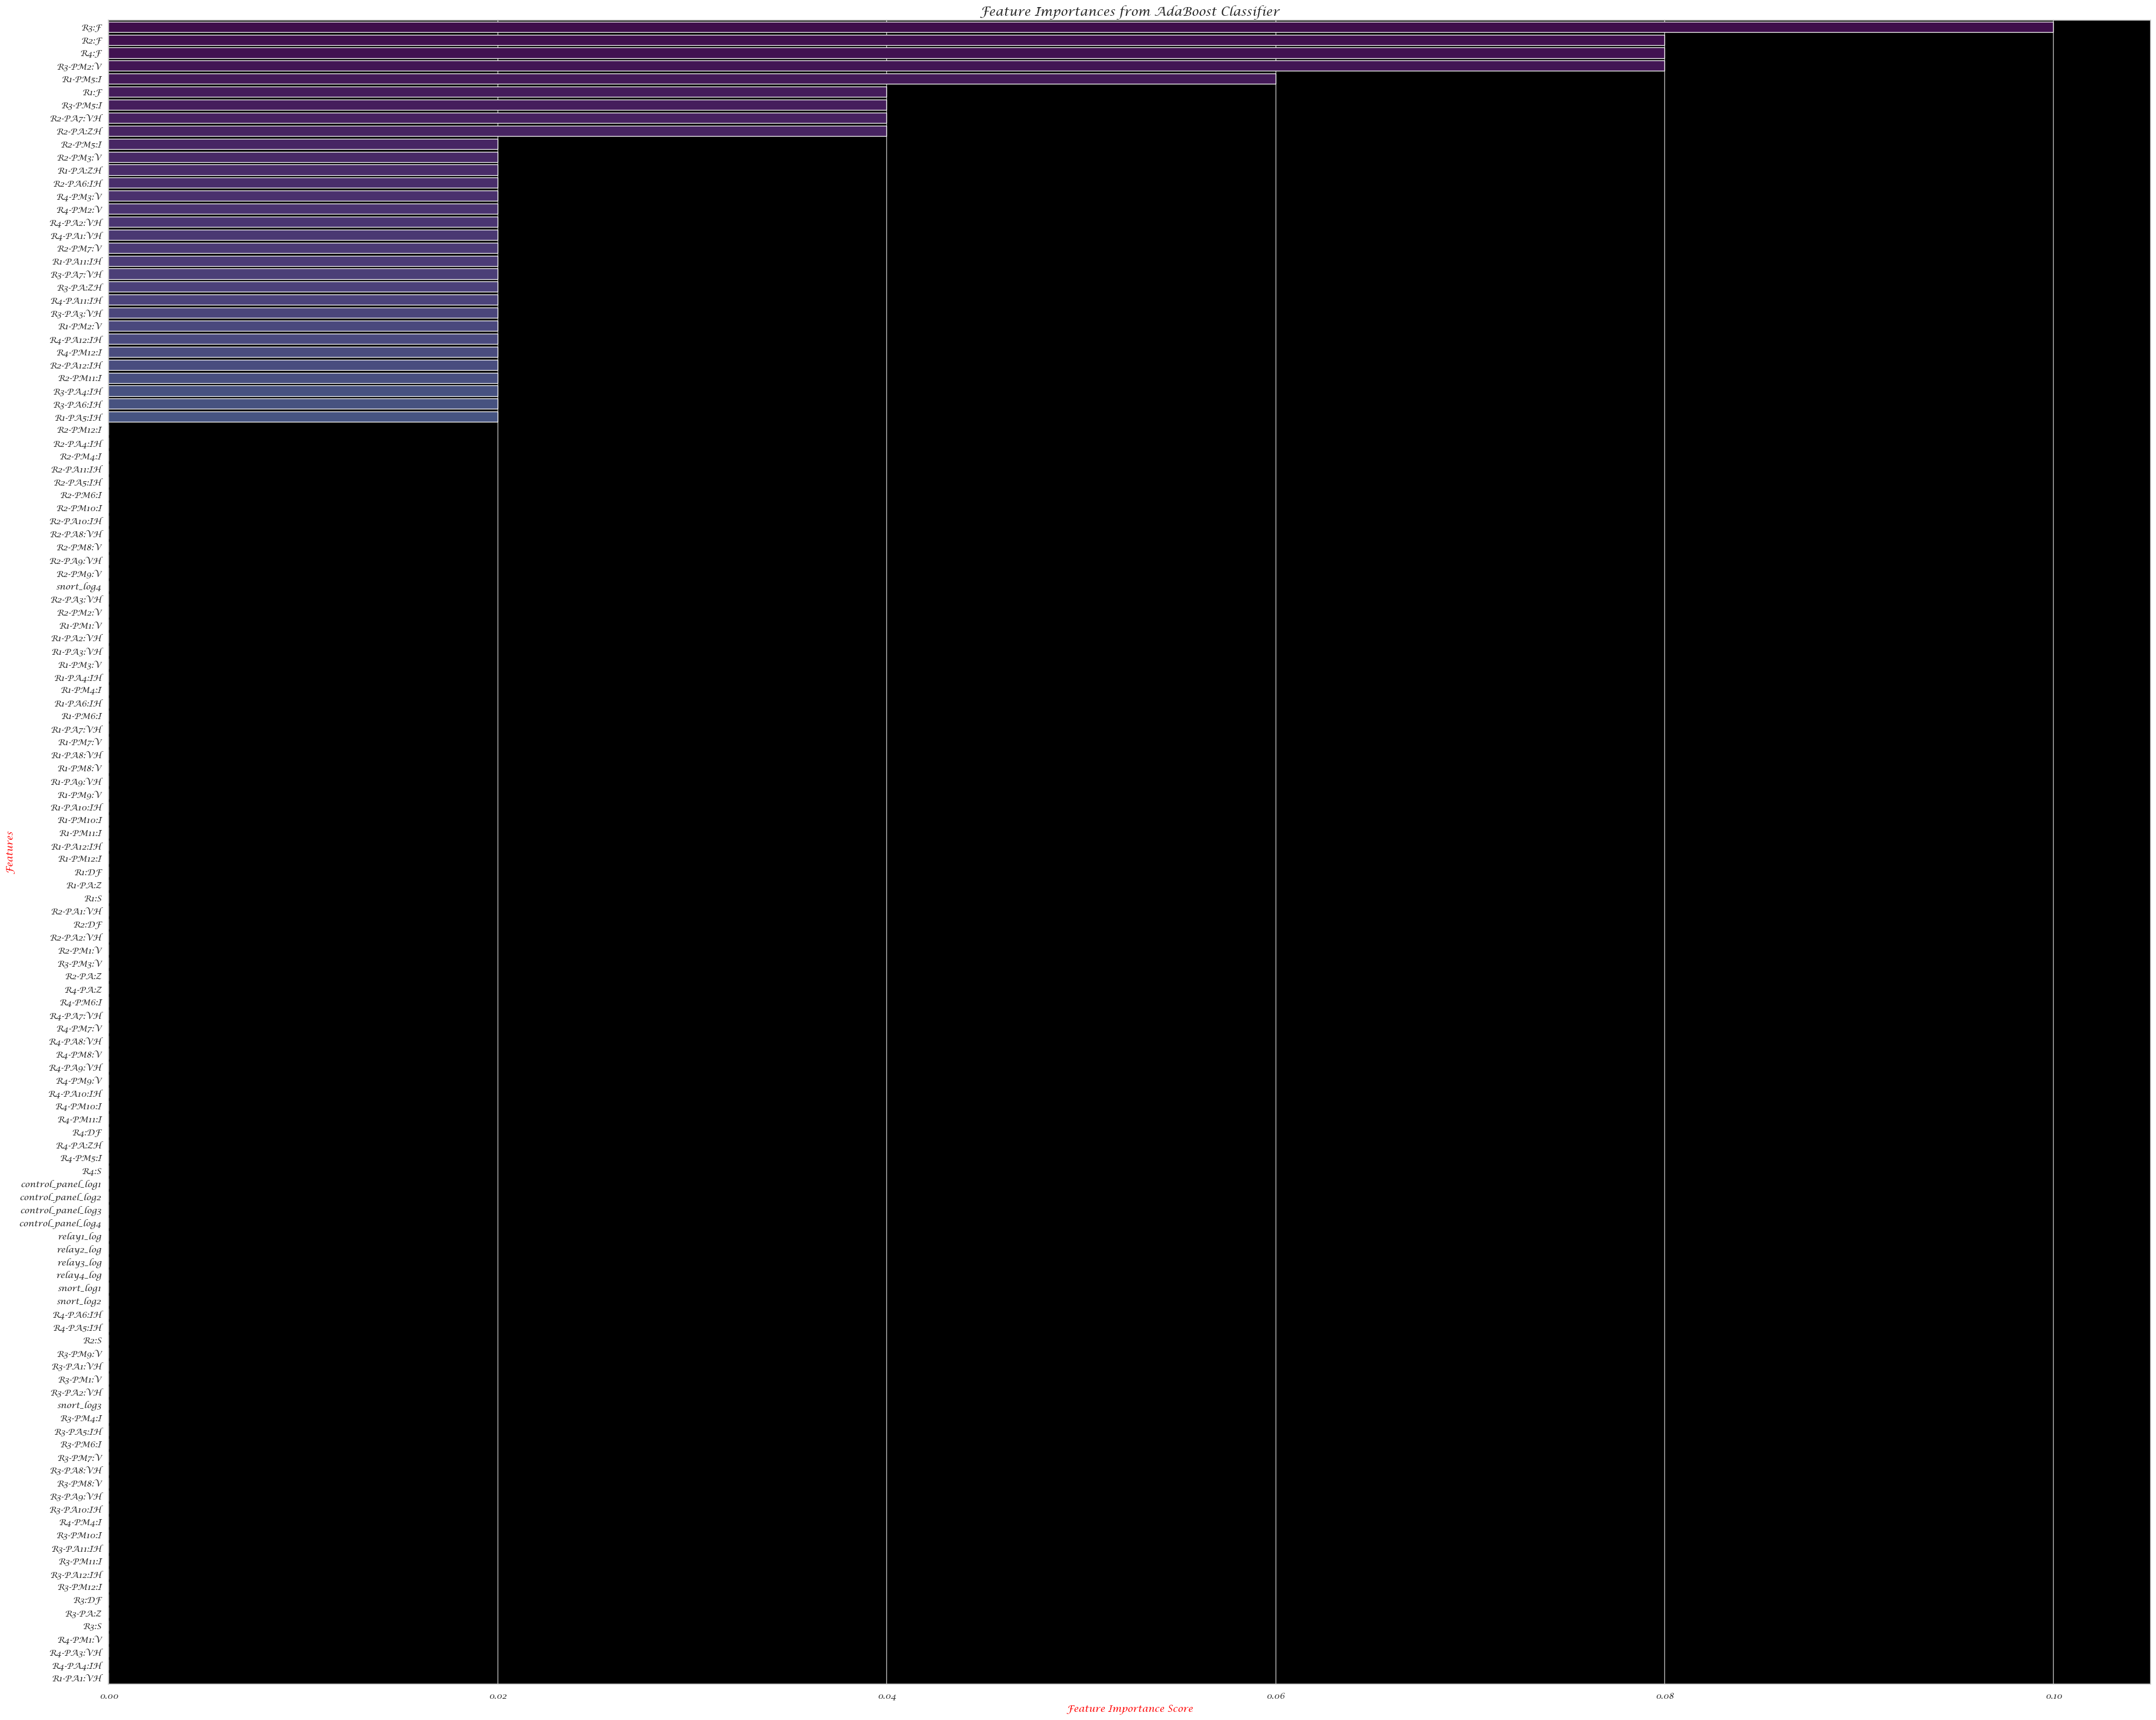

In [73]:
# Feature Importance Plot (AdaBoost Classifier)
importances = AdaBoost.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(40, 32))
plt.title("Feature Importances from AdaBoost Classifier", fontsize=16)
sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 8. Gradient Boosting Classifier

 Train set score: 94.43
 Accuracy Score : 88.20
 Precision Score: 68.05
 Recall Score   : 88.29
 f1 Score       : 76.86 

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       719
           1       0.68      0.88      0.77       205

    accuracy                           0.88       924
   macro avg       0.82      0.88      0.84       924
weighted avg       0.90      0.88      0.89       924
 

 Confusion Matrix:
 [[634  85]
 [ 24 181]]


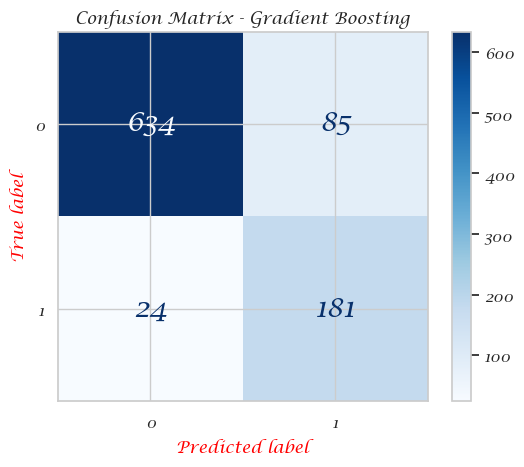

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
GradientBoost = GradientBoostingClassifier()
GradientBoost.fit(X_train_res, y_train_res)

# Predictions
y_pred_GradientBoost = GradientBoost.predict(X_test)

# Accuracy Score
acc_GradientBoost = round(accuracy_score(y_test, y_pred_GradientBoost) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(GradientBoost.score(X_train_res, y_train_res) * 100))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_GradientBoost) * 100))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_GradientBoost) * 100))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_GradientBoost) * 100))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_GradientBoost) * 100), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_GradientBoost), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_GradientBoost)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Plot
disp = ConfusionMatrixDisplay.from_estimator(GradientBoost, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


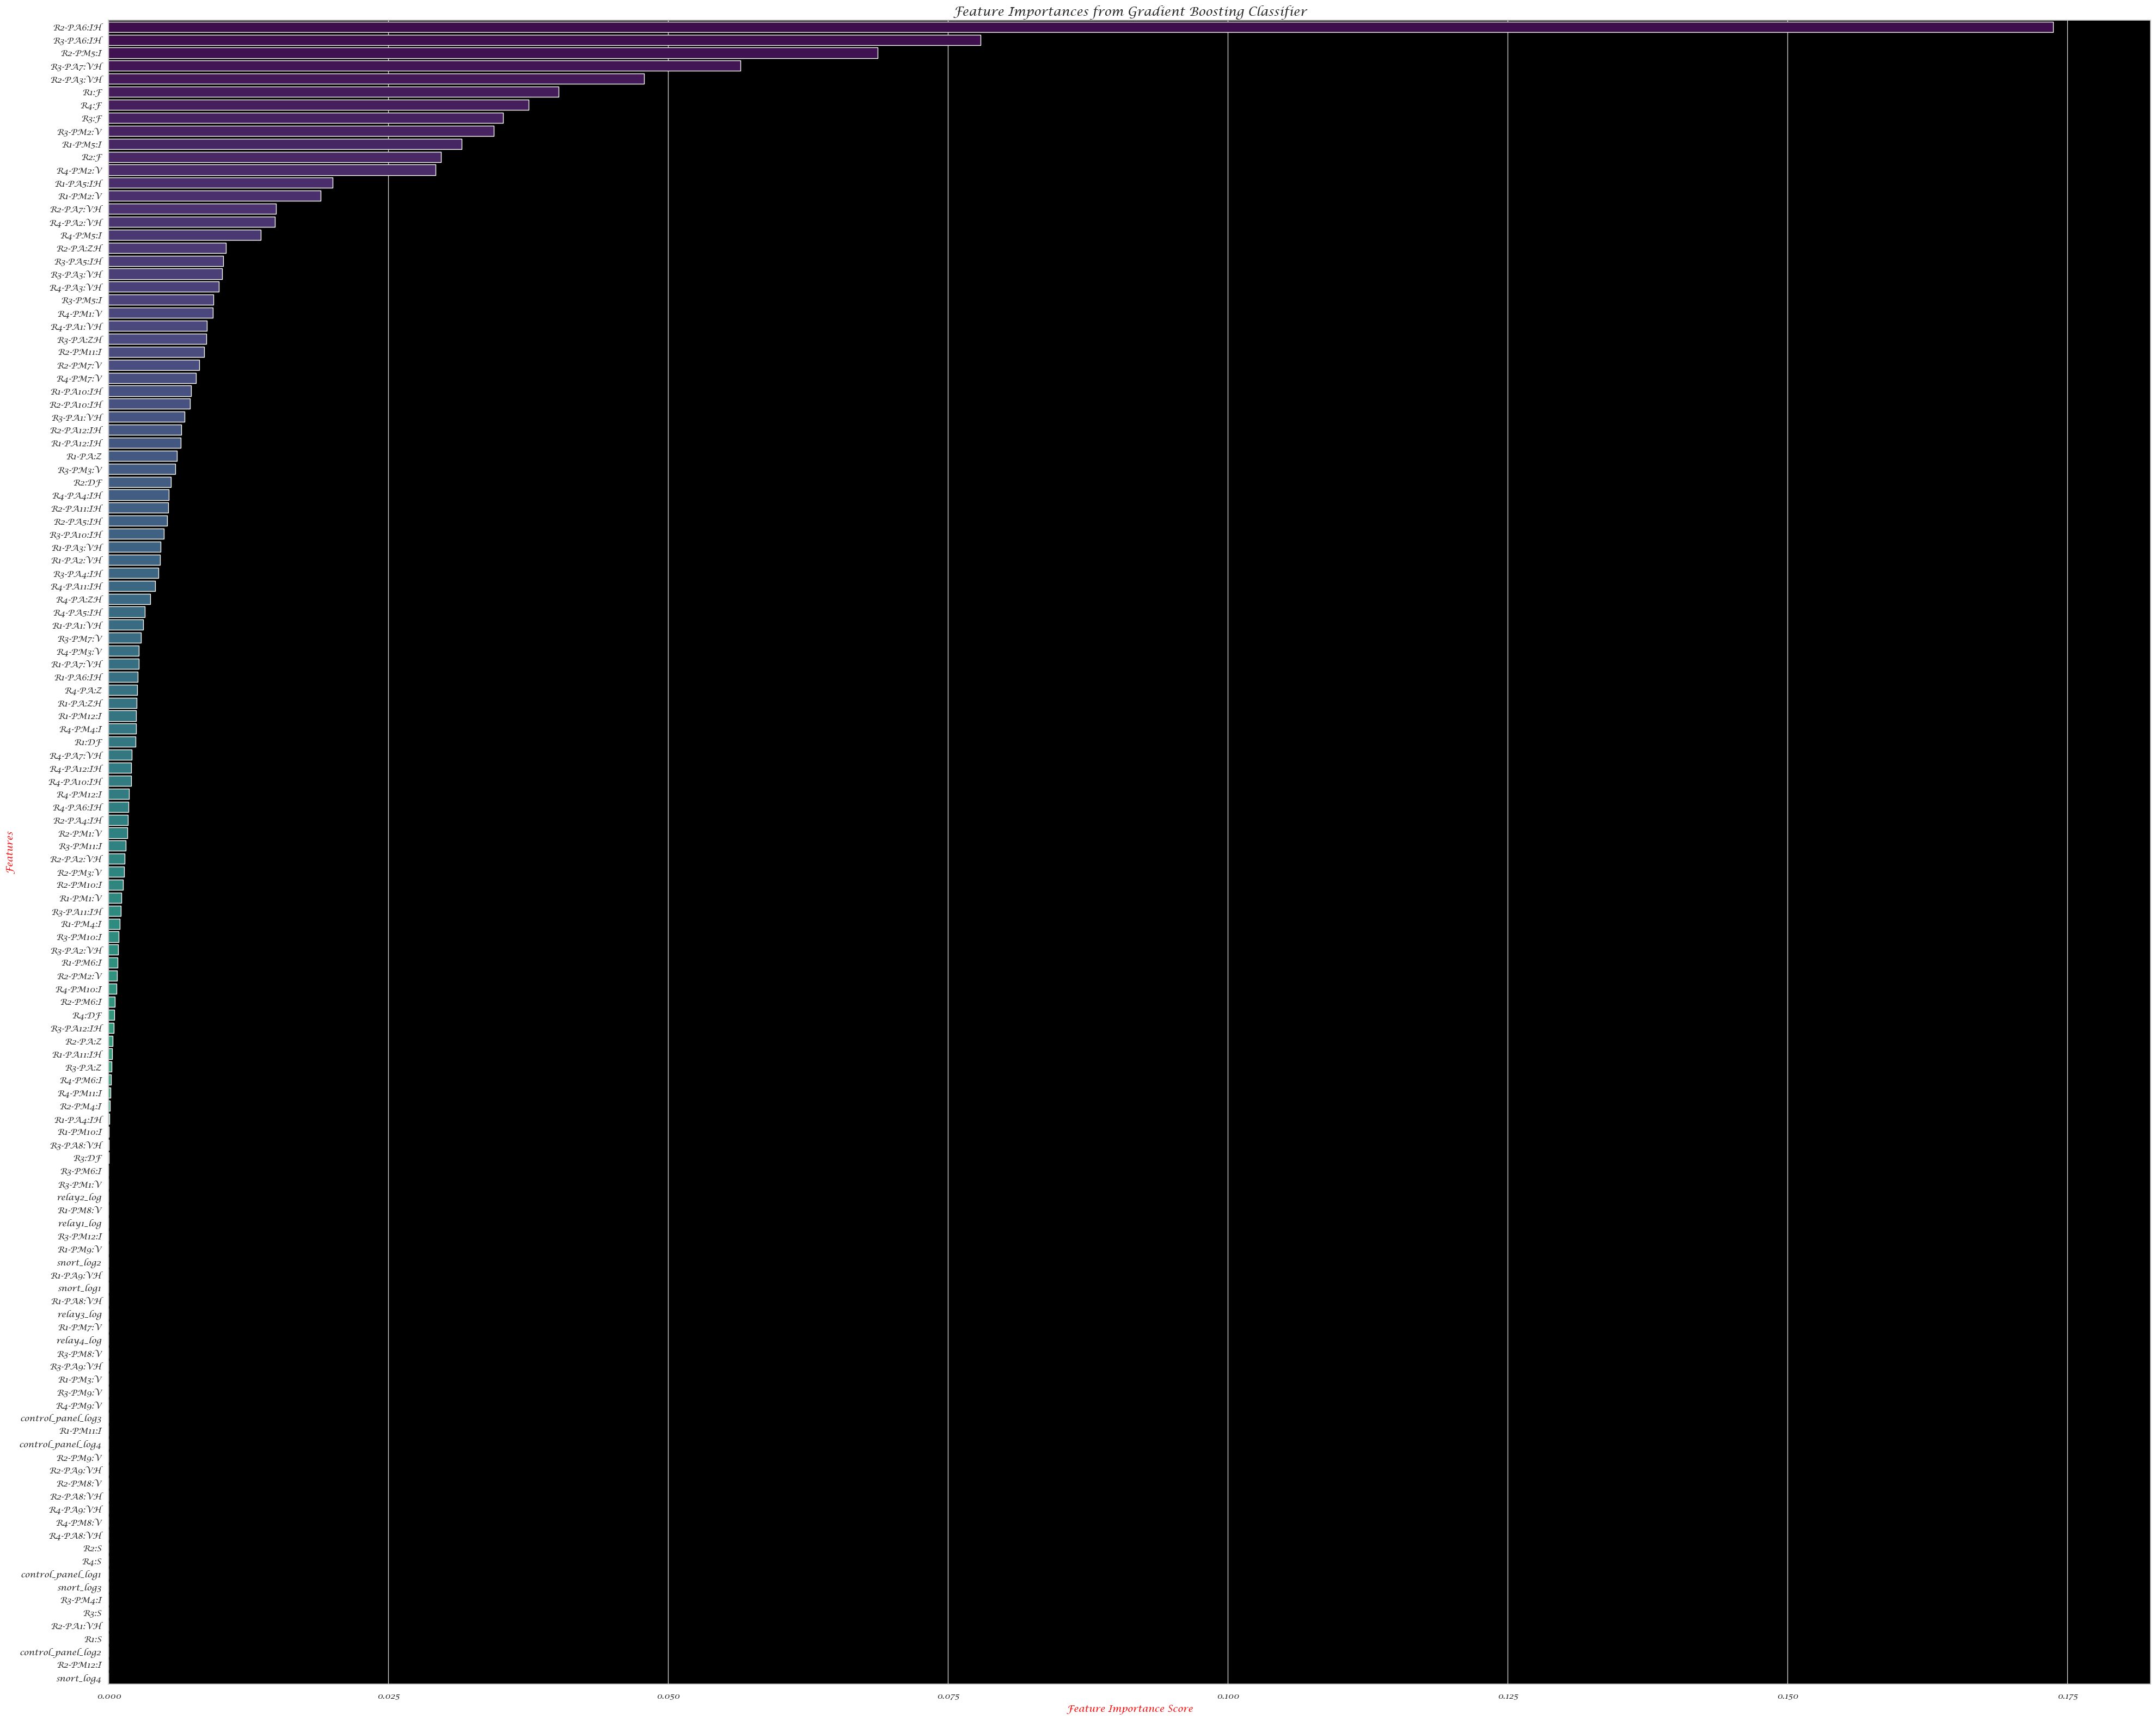

In [75]:
# Feature Importance Plot (Gradient Boosting Classifier)
importances = GradientBoost.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(40, 32))
plt.title("Feature Importances from Gradient Boosting Classifier", fontsize=16)
sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 9. Support Vector Classifier

 Train set score: 50.52
 Accuracy Score : 23.27
 Precision Score: 22.37
 Recall Score   : 99.51
 f1 Score       : 36.53 

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.02      0.03       719
           1       0.22      1.00      0.37       205

    accuracy                           0.23       924
   macro avg       0.57      0.51      0.20       924
weighted avg       0.76      0.23      0.10       924
 

 Confusion Matrix:
 [[ 11 708]
 [  1 204]]


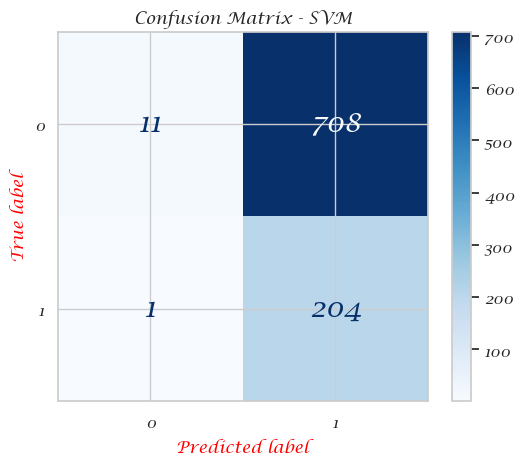

In [76]:
from sklearn.svm import SVC

# Train the model
SVM = SVC()
SVM.fit(X_train_res, y_train_res)

# Predictions
y_pred_SVM = SVM.predict(X_test)

# Accuracy Score
acc_SVM = round(accuracy_score(y_test, y_pred_SVM) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(SVM.score(X_train_res, y_train_res) * 100))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_SVM) * 100))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_SVM) * 100))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_SVM) * 100))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_SVM) * 100), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_SVM), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Plot
disp = ConfusionMatrixDisplay.from_estimator(SVM, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()


# 10. KNN Classifier

 Train set score: 94.85
 Accuracy Score : 87.55
 Precision Score: 67.31
 Recall Score   : 85.37
 f1 Score       : 75.27 

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       719
           1       0.67      0.85      0.75       205

    accuracy                           0.88       924
   macro avg       0.81      0.87      0.83       924
weighted avg       0.89      0.88      0.88       924
 

 Confusion Matrix:
 [[634  85]
 [ 30 175]]


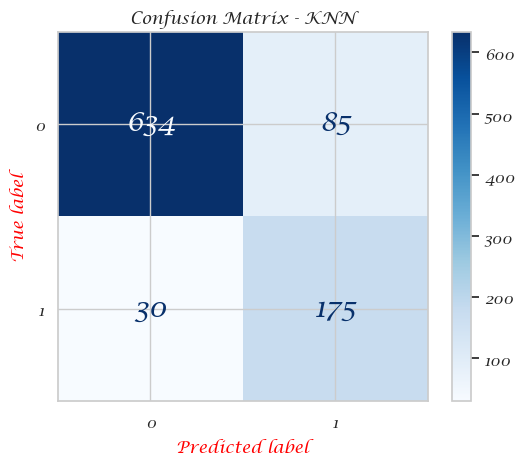

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
KNN = KNeighborsClassifier()
KNN.fit(X_train_res, y_train_res)

# Predictions
y_pred_KNN = KNN.predict(X_test)

# Accuracy Score
acc_KNN = round(accuracy_score(y_test, y_pred_KNN) * 100, 2)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(KNN.score(X_train_res, y_train_res) * 100))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_KNN) * 100))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_KNN) * 100))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_KNN) * 100))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_KNN) * 100), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_KNN), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Plot
disp = ConfusionMatrixDisplay.from_estimator(KNN, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()


# XETStack: ExtraTrees + XGBoost Base Learners with XGBoost Meta-Learner (Stacked Ensemble)

In [78]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [79]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # ExtraTrees hyperparameters
    et_n_estimators = trial.suggest_int("et_n_estimators", 100, 400)
    et_max_features = trial.suggest_categorical("et_max_features", ["sqrt", "log2", None])
    et_max_depth = trial.suggest_int("et_max_depth", 5, 30)

    # XGBoost base learner hyperparameters
    xgb_base_n_estimators = trial.suggest_int("xgb_base_n_estimators", 100, 500)
    xgb_base_learning_rate = trial.suggest_float("xgb_base_learning_rate", 0.01, 0.1)
    xgb_base_max_depth = trial.suggest_int("xgb_base_max_depth", 3, 10)

    # XGBoost meta-model hyperparameters
    meta_n_estimators = trial.suggest_int("meta_n_estimators", 200, 600)
    meta_learning_rate = trial.suggest_float("meta_learning_rate", 0.01, 0.1)

    # Define base learners
    et = ExtraTreesClassifier(
        n_estimators=et_n_estimators,
        max_features=et_max_features,
        max_depth=et_max_depth,
        class_weight="balanced",
        random_state=42
    )

    xgb = XGBClassifier(
        n_estimators=xgb_base_n_estimators,
        learning_rate=xgb_base_learning_rate,
        max_depth=xgb_base_max_depth,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    # Meta-learner (XGBoost)
    meta_model = XGBClassifier(
        n_estimators=meta_n_estimators,
        learning_rate=meta_learning_rate,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    # Stack model
    stack_model = StackingClassifier(
        estimators=[('et', et), ('xgb', xgb)],
        final_estimator=meta_model,
        cv=5,
        passthrough=True,
        n_jobs=-1
    )

    stack_model.fit(X_train_res, y_train_res)
    y_pred = stack_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc


In [80]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best trial:")
print(study.best_trial)

[I 2025-04-18 04:52:10,927] A new study created in memory with name: no-name-ccdb445d-f193-4d83-ad7d-c56c6b56fdf2
[I 2025-04-18 04:54:11,777] Trial 0 finished with value: 0.9805194805194806 and parameters: {'et_n_estimators': 337, 'et_max_features': None, 'et_max_depth': 25, 'xgb_base_n_estimators': 394, 'xgb_base_learning_rate': 0.056877438986091, 'xgb_base_max_depth': 4, 'meta_n_estimators': 529, 'meta_learning_rate': 0.07969394823097341}. Best is trial 0 with value: 0.9805194805194806.
[I 2025-04-18 04:56:04,273] Trial 1 finished with value: 0.9794372294372294 and parameters: {'et_n_estimators': 342, 'et_max_features': None, 'et_max_depth': 25, 'xgb_base_n_estimators': 273, 'xgb_base_learning_rate': 0.04755007851808987, 'xgb_base_max_depth': 10, 'meta_n_estimators': 381, 'meta_learning_rate': 0.04720767686511312}. Best is trial 0 with value: 0.9805194805194806.
[I 2025-04-18 04:57:50,583] Trial 2 finished with value: 0.9696969696969697 and parameters: {'et_n_estimators': 307, 'et_ma

Best trial:
FrozenTrial(number=13, state=1, values=[0.9848484848484849], datetime_start=datetime.datetime(2025, 4, 18, 5, 11, 56, 918500), datetime_complete=datetime.datetime(2025, 4, 18, 5, 13, 8, 654057), params={'et_n_estimators': 187, 'et_max_features': None, 'et_max_depth': 21, 'xgb_base_n_estimators': 201, 'xgb_base_learning_rate': 0.07052145235610525, 'xgb_base_max_depth': 6, 'meta_n_estimators': 282, 'meta_learning_rate': 0.09838275966296553}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'et_n_estimators': IntDistribution(high=400, log=False, low=100, step=1), 'et_max_features': CategoricalDistribution(choices=('sqrt', 'log2', None)), 'et_max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'xgb_base_n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'xgb_base_learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'xgb_base_max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'meta_n_estima

 Train set score: 100.00
 Accuracy Score : 98.59
 Precision Score: 97.06
 Recall Score   : 96.59
 f1 Score       : 96.82 

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       719
           1       0.97      0.97      0.97       205

    accuracy                           0.99       924
   macro avg       0.98      0.98      0.98       924
weighted avg       0.99      0.99      0.99       924
 

 Confusion Matrix:
 [[713   6]
 [  7 198]]


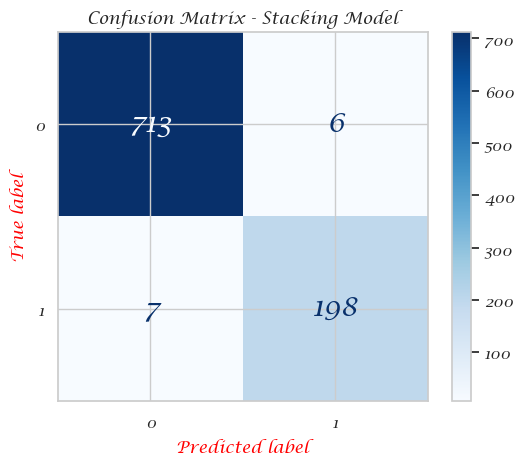

In [81]:
from sklearn.ensemble import StackingClassifier

# Define base models
et = ExtraTreesClassifier(
    n_estimators=295,
    max_features=None,
    max_depth=30,
    class_weight="balanced",
    random_state=42
)

xgb = XGBClassifier(
    n_estimators=178,
    learning_rate=0.0914,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define meta-model
meta_model = XGBClassifier(
    n_estimators=259,
    learning_rate=0.0218,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define stacking model
stack_model = StackingClassifier(
    estimators=[('et', et), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Train the model
stack_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_Stack = stack_model.predict(X_test)

# Print Scores
print("\033[031m\033[1m", "Train set score: {:.2f}".format(stack_model.score(X_train_res, y_train_res) * 100))
print("\033[031m\033[1m", "Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_Stack) * 100))
print("\033[031m\033[1m", "Precision Score: {:.2f}".format(precision_score(y_test, y_pred_Stack) * 100))
print("\033[031m\033[1m", "Recall Score   : {:.2f}".format(recall_score(y_test, y_pred_Stack) * 100))
print("\033[031m\033[1m", "f1 Score       : {:.2f}".format(f1_score(y_test, y_pred_Stack) * 100), '\n')

# Classification Report
print("\033[032m\033[1m", "Classification Report:\n", classification_report(y_test, y_pred_Stack), '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_Stack)
print("\033[034m\033[1m", "Confusion Matrix:\n", conf_matrix)

# Plot
disp = ConfusionMatrixDisplay.from_estimator(stack_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Stacking Model')
plt.show()

# Summary

Model Evaluation Summary:


Model  Accuracy  Precision  Recall  F1 Score
1              XETStack     98.59      97.06   96.59     96.82
2           Extra Trees     97.29      92.86   95.12     93.98
3               XGBoost     96.75      92.68   92.68     92.68
4         Random Forest     96.21      91.26   91.71     91.48
5               Bagging     94.81      88.67   87.80     88.24
6     Gradient Boosting     88.20      68.05   88.29     76.86
7                   KNN     87.55      67.31   85.37     75.27
8              AdaBoost     80.41      54.05   78.05     63.87
9   Logistic Regression     68.83      40.37   84.88     54.72
10        Decision Tree     63.85      37.52   94.63     53.74
11                  SVM     23.27      22.37   99.51     36.53

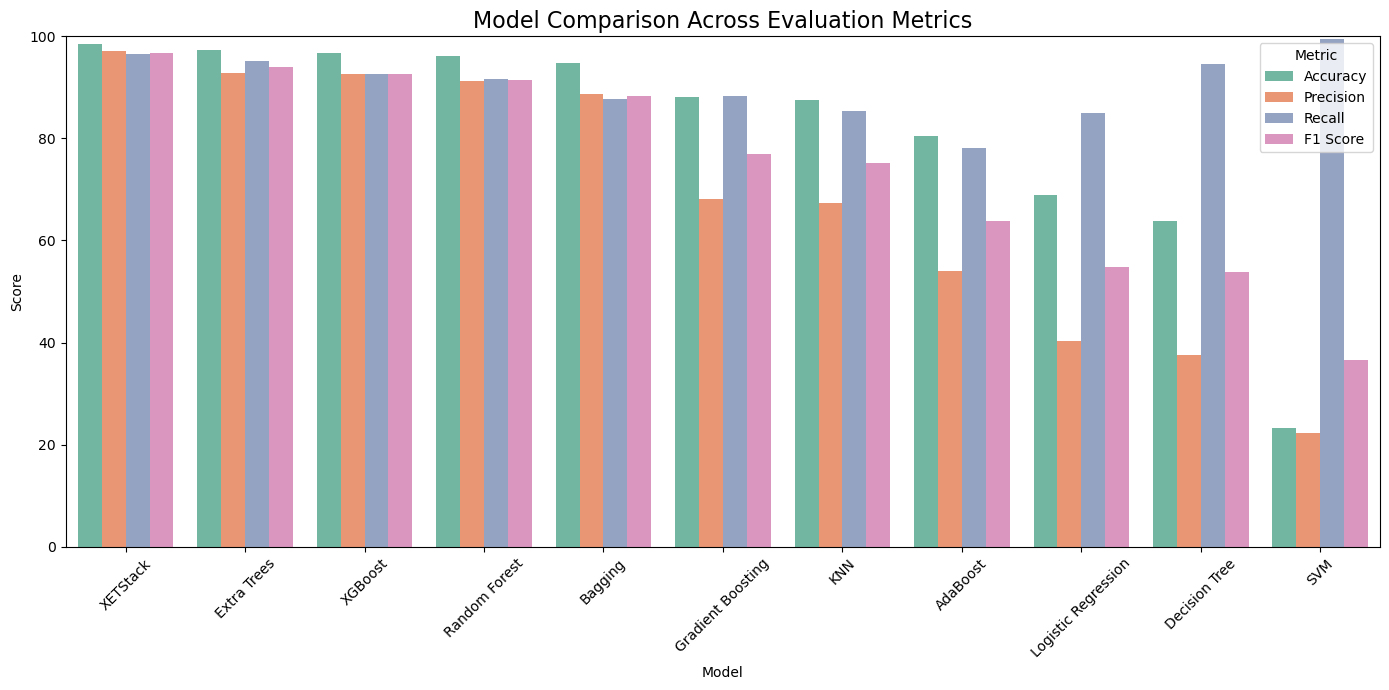

In [83]:
# Create a summary table of metrics
summary = pd.DataFrame({
    'Model': [
        'Extra Trees', 'Random Forest', 'XGBoost', 'Bagging',
        'Logistic Regression', 'Decision Tree', 'AdaBoost',
        'Gradient Boosting', 'SVM', 'KNN', 'XETStack'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_extra_trees_classifier) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_xgb) * 100,
        accuracy_score(y_test, y_pred_bagging) * 100,
        accuracy_score(y_test, y_pred_LogisticRegression) * 100,
        accuracy_score(y_test, y_pred_decision_tree) * 100,
        accuracy_score(y_test, y_pred_AdaBoost) * 100,
        accuracy_score(y_test, y_pred_GradientBoost) * 100,
        accuracy_score(y_test, y_pred_SVM) * 100,
        accuracy_score(y_test, y_pred_KNN) * 100,
        accuracy_score(y_test, y_pred_Stack) * 100
    ],
    'Precision': [
        precision_score(y_test, y_pred_extra_trees_classifier) * 100,
        precision_score(y_test, y_pred_rf) * 100,
        precision_score(y_test, y_pred_xgb) * 100,
        precision_score(y_test, y_pred_bagging) * 100,
        precision_score(y_test, y_pred_LogisticRegression) * 100,
        precision_score(y_test, y_pred_decision_tree) * 100,
        precision_score(y_test, y_pred_AdaBoost) * 100,
        precision_score(y_test, y_pred_GradientBoost) * 100,
        precision_score(y_test, y_pred_SVM) * 100,
        precision_score(y_test, y_pred_KNN) * 100,
        precision_score(y_test, y_pred_Stack) * 100
    ],
    'Recall': [
        recall_score(y_test, y_pred_extra_trees_classifier) * 100,
        recall_score(y_test, y_pred_rf) * 100,
        recall_score(y_test, y_pred_xgb) * 100,
        recall_score(y_test, y_pred_bagging) * 100,
        recall_score(y_test, y_pred_LogisticRegression) * 100,
        recall_score(y_test, y_pred_decision_tree) * 100,
        recall_score(y_test, y_pred_AdaBoost) * 100,
        recall_score(y_test, y_pred_GradientBoost) * 100,
        recall_score(y_test, y_pred_SVM) * 100,
        recall_score(y_test, y_pred_KNN) * 100,
        recall_score(y_test, y_pred_Stack) * 100
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_extra_trees_classifier) * 100,
        f1_score(y_test, y_pred_rf) * 100,
        f1_score(y_test, y_pred_xgb) * 100,
        f1_score(y_test, y_pred_bagging) * 100,
        f1_score(y_test, y_pred_LogisticRegression) * 100,
        f1_score(y_test, y_pred_decision_tree) * 100,
        f1_score(y_test, y_pred_AdaBoost) * 100,
        f1_score(y_test, y_pred_GradientBoost) * 100,
        f1_score(y_test, y_pred_SVM) * 100,
        f1_score(y_test, y_pred_KNN) * 100,
        f1_score(y_test, y_pred_Stack) * 100
    ]
})

# Round values for readability
summary = summary.round(2)
summary.index = range(1, len(summary) + 1)
summary = summary.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
summary.index += 1 

# Print Tabular Summary
print("\033[1mModel Evaluation Summary:\033[0m")
display(summary)

# Convert to long format for grouped barplot
summary_long = pd.melt(summary, id_vars='Model', var_name='Metric', value_name='Score')

# Grouped Bar Plot (All 4 metrics in one plot)
# Set style to white background
sns.set_style("whitegrid")
plt.style.use("default")

plt.figure(figsize=(14, 7))
sns.barplot(data=summary_long, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Model Comparison Across Evaluation Metrics', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Roc Auc Curve
The Receiver Operating Characteristic (ROC) curve graphically shows a model's ability to distinguish between positive and negative classes, plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds. The Area Under the Curve (AUC) summarizes this performance as a single value, with higher AUC indicating better discrimination. 

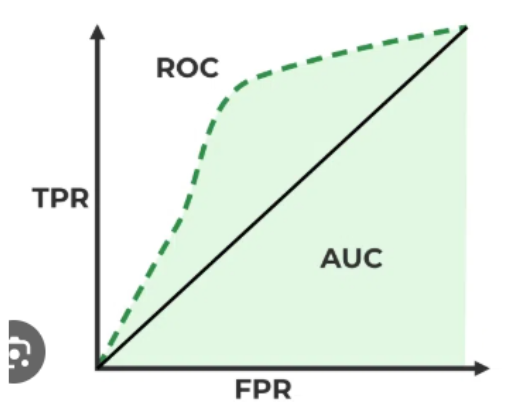

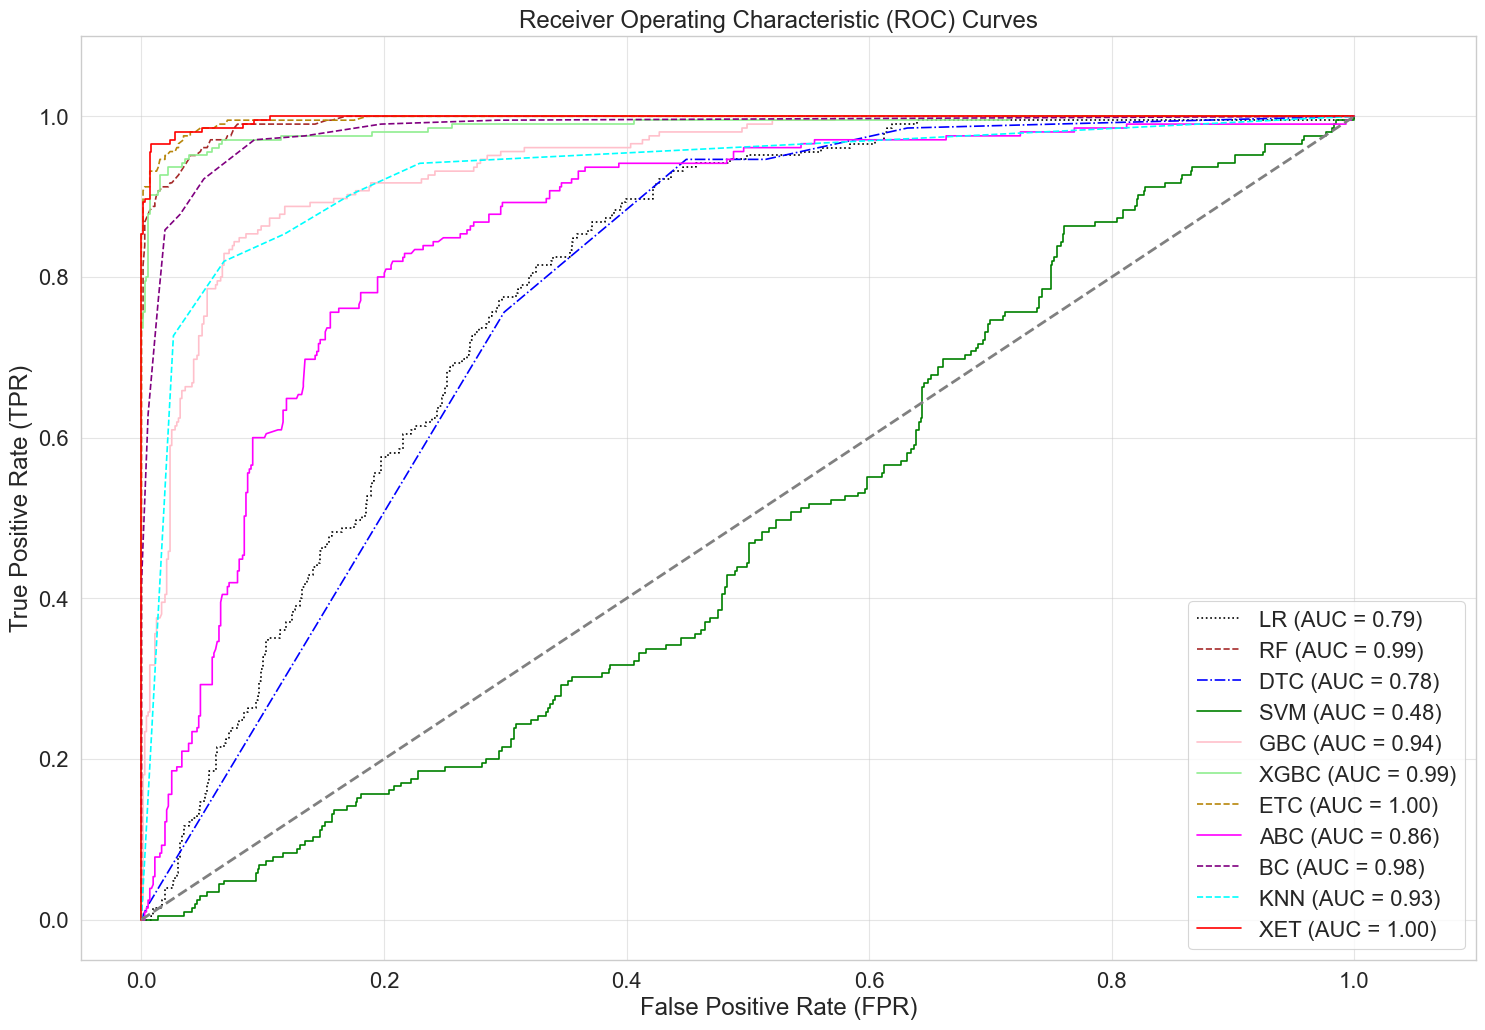

In [84]:
from sklearn.metrics import roc_curve, auc

# List of classifiers
all_clf = [log_reg, rf_classifier, dec, SVM, GradientBoost, xgb_clf, extra_trees_classifier, AdaBoost, bagging_model, KNN, stack_model]
clf_labels = ["LR", "RF", "DTC", "SVM", "GBC", "XGBC", "ETC", "ABC", "BC", "KNN", "XET"]
colors = ["black", "brown", "blue", "green", "pink", "lightgreen", "darkgoldenrod", "magenta", "purple", "cyan", "red"]
linestyles = [":", "--", "-.", "-", "-", "-", "--", "-", "--", "--", "-"]

# Set plot size and style
plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")
sns.set_context('paper', font_scale=1.8)

# Plot ROC curves
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)  # For models like SVM without predict_proba
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, color=clr, linestyle=ls,
             label='%s (AUC = %0.2f)' % (label, roc_auc)) # Plot ROC curve

# Add legend, grid, and axis labels
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)  # Diagonal line (random classifier)
plt.xlim([-0.05, 1.1])
plt.ylim([-0.05, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Show plot
plt.show()

# Hyperparameter Tuning

# Grid Search CV

In [89]:
from sklearn.model_selection import GridSearchCV

# Define classifiers
lr_ht = LogisticRegression(max_iter=1000)
rf_ht = RandomForestClassifier()
abc_ht = AdaBoostClassifier()
gbc_ht = GradientBoostingClassifier()
bc_ht = BaggingClassifier()
etc_ht = ExtraTreesClassifier()
xgbc_ht = XGBClassifier(eval_metric='logloss')
svm_ht = SVC(probability=True)
dtc_ht = DecisionTreeClassifier()
knn_ht = KNeighborsClassifier()

# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "Bagging": {
        'n_estimators': [50, 100],
        'max_samples': [0.8, 1.0]
    },
    "Extra Trees": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10],
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
    },
    "SVM": {
        'C': [1, 10],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# To store results
summary_results = []

# Loop through all models
for model_name, model in zip(
    ["Logistic Regression", "Random Forest", "AdaBoost", "Gradient Boosting", "Bagging", "Extra Trees", "XGBoost", "SVM", "Decision Tree", "KNN"],
    [lr_ht, rf_ht, abc_ht, gbc_ht, bc_ht, etc_ht, xgbc_ht, svm_ht, dtc_ht, knn_ht]
):
    print(f"\n Tuning {model_name}...")
    
    # Get the grid for the model
    param_grid = param_grids[model_name]

    # Create GridSearchCV object
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)  # Use your training data

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    acc = f"{accuracy_score(y_test, y_pred) * 100:.2f}"
    prec = f"{precision_score(y_test, y_pred) * 100:.2f}"
    rec = f"{recall_score(y_test, y_pred) * 100:.2f}"
    f1 = f"{f1_score(y_test, y_pred) * 100:.2f}"

    summary_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Best Params": grid.best_params_
    })

summary_results.append({
    "Model": "XETStack",
    "Accuracy": "98.59",
    "Precision": "97.06",
    "Recall": "96.59",
    "F1 Score": "96.82",
    "Best Params": "params={'et_n_estimators': 295, 'et_max_features': None, 'et_max_depth': 30, 'xgb_base_n_estimators': 178, 'xgb_base_learning_rate': 0.09139642862274602, 'xgb_base_max_depth': 4, 'meta_n_estimators': 259, 'meta_learning_rate': 0.0218255945193916}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'et_n_estimators': IntDistribution(high=400, log=False, low=100, step=1), 'et_max_features': CategoricalDistribution(choices=('sqrt', 'log2', None)), 'et_max_depth': IntDistribution(high=30, log=False, low=5, step=1), 'xgb_base_n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'xgb_base_learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'xgb_base_max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'meta_n_estimators': IntDistribution(high=600, log=False, low=200, step=1), 'meta_learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None)}, trial_id=21, value=None)"
})

# Create and sort the DataFrame
results_df = pd.DataFrame(summary_results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

# Start index from 1
results_df.index = results_df.index + 1

# Display the results
print("\n Model Performance Summary:")
print(results_df)

# Save to Excel
results_df.to_excel("Model_Performance_Summary.xlsx", index=False)

print("Model performance summary saved to 'Model_Performance_Summary.xlsx'")


 Tuning Logistic Regression...

 Tuning Random Forest...

 Tuning AdaBoost...

 Tuning Gradient Boosting...

 Tuning Bagging...

 Tuning Extra Trees...

 Tuning XGBoost...

 Tuning SVM...

 Tuning Decision Tree...

 Tuning KNN...

 Model Performance Summary:
                  Model Accuracy Precision Recall F1 Score  \
1              XETStack    98.59     97.06  96.59    96.82   
2           Extra Trees    97.29     92.45  95.61    94.00   
3         Random Forest    96.65     91.43  93.66    92.53   
4               Bagging    96.21     90.48  92.68    91.57   
5               XGBoost    95.35     86.16  94.15    89.98   
6     Gradient Boosting    94.48     85.00  91.22    88.00   
7                   KNN    90.15     74.15  85.37    79.37   
8              AdaBoost    85.82     64.57  80.00    71.46   
9         Decision Tree    81.71     56.12  80.49    66.13   
10  Logistic Regression    70.67     41.99  84.39    56.08   
11                  SVM    23.27     22.37  99.51    36.53

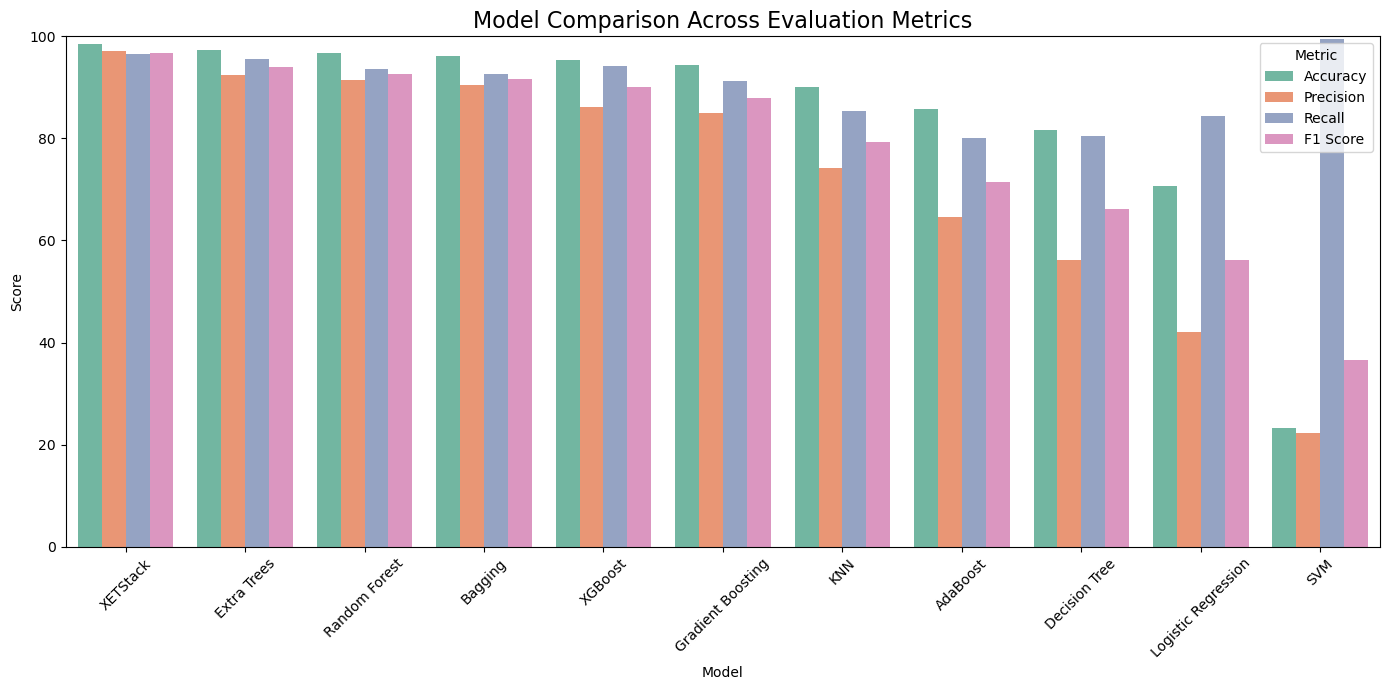

In [90]:
# Convert string scores to numeric
metrics_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']].copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    metrics_df[col] = pd.to_numeric(metrics_df[col], errors='coerce')

# Melt to long format
metrics_long = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Score')

# Grouped Bar Plot
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
plt.style.use("default")

sns.barplot(data=metrics_long, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Model Comparison Across Evaluation Metrics', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='Metric')
plt.tight_layout()

# Save as JPG
plt.savefig("Model_Comparison.jpg", format='jpg', dpi=300)

plt.show()

# Working of XETStack

In [91]:
import random

# Combine features and label for selecting a full row later
full_data = X.copy()
full_data['marker'] = y

# Select a random index
random_index = random.randint(0, len(full_data) - 1)

# Extract the selected row
random_row = full_data.iloc[random_index]
random_features = random_row.drop('marker').values.reshape(1, -1)
actual_label = random_row['marker']

# Make prediction
predicted_label = stack_model.predict(random_features)[0]

# Print result
print(f"\nRandom Test Row Index: {random_index}")
print(f"Model Prediction: {'Attack' if predicted_label == 0 else 'Natural'}")
print(f"Actual Label: {'Attack' if actual_label == 0 else 'Natural'}")

# Display the actual row
print("\n\033[036m\033[1m", "Random Test Sample:")
print("\033[036m", pd.DataFrame(random_row).transpose(), '\n')


Random Test Row Index: 3061
Model Prediction: Attack
Actual Label: Attack

 Random Test Sample:
       R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V  R1-PA3:VH     R1-PM3:V  \
3247 -65.592208  134969.4124  174.419812  134919.2659  54.425261  135044.6322   

      R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  R1-PA6:IH   R1-PM6:I  \
3247 -62.274783  507.76403  177.771615  505.74982  54.396613  527.17369   

      R1-PA7:VH     R1-PM7:V  R1-PA8:VH  R1-PM8:V  R1-PA9:VH  R1-PM9:V  \
3247 -65.586479  134969.4124        0.0       0.0        0.0       0.0   

      R1-PA10:IH  R1-PM10:I  R1-PA11:IH  R1-PM11:I  R1-PA12:IH  R1-PM12:I  \
3247   -63.40351  513.25733  122.166061   11.71904   -1.535527   12.63459   

       R1:F  R1:DF   R1-PA:Z  R1-PA:ZH  R1:S  R2-PA1:VH   R2-PM1:V  \
3247  59.96   0.07  7.179749 -0.101791   0.0  -73.30353  134445.25   

       R2-PA2:VH     R2-PM2:V  R2-PA3:VH     R2-PM3:V   R2-PA4:IH    R2-PM4:I  \
3247  166.758727  134292.7656  46.727602  134522.8281  110.646